Step 1: Importing Necessary Packages 

In [1]:
# Filtering Warnings
import warnings
warnings.filterwarnings('ignore')

#Other's Libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
 
 

Step:2 Import the data sets

application_data.csv ad df1 and previous_application.csv as df2

In [2]:
df1 = pd.read_csv("application_data.csv")
df2 = pd.read_csv("previous_application.csv")

Step:3 To check the necessay details 

In [3]:
print(df1.head()) 
print(df1.shape)
print(df1.info(verbose = True))
print(df1.describe())



   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

Step:4 Data Cleaning

In [4]:
#To check the precentage of missing values.
(df1.isnull().sum()/len(df1)*100).sort_values(ascending = False).head(50)
 
null_col = df1.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col.values >(0.40*len(df1))]

 

In [5]:
#lets check how many columns are with null values having morethan 40% and Remove those
print(len(null_col))

#Now making list of column names having null values greater than 40%
label = list(null_col.index.values)  

#Droping those columns
df1.drop(labels = label,axis=1,inplace = True)  
print(df1.shape)

#To check the percentage of null values for each column

null = (df1.isnull().sum()/len(df1)*100).sort_values(ascending = False).head(50)
print(null.head(50))

49
(307511, 73)
OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3         

In [6]:
#To check the percentage of null values for each column

null = (df1.isnull().sum()/len(df1)*100).sort_values(ascending = False).head(50)
print(null.head(50))

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000


In [7]:
# Handle these missing values by observing them

df1.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df1.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True)  

df1.AMT_REQ_CREDIT_BUREAU_MON.fillna(df1.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace = True)     

df1.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(df1.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace = True)  

df1.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df1.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace = True)    

df1.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df1.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace = True)  

df1.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df1.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace = True)    

df1.NAME_TYPE_SUITE.fillna(df1.NAME_TYPE_SUITE.mode()[0],inplace = True)  

df1.OBS_30_CNT_SOCIAL_CIRCLE.fillna( df1.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True)  

df1.DEF_30_CNT_SOCIAL_CIRCLE.fillna( df1.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) 

df1.OBS_60_CNT_SOCIAL_CIRCLE.fillna( df1.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True)  

df1.DEF_60_CNT_SOCIAL_CIRCLE.fillna( df1.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True)  

df1.CNT_FAM_MEMBERS.fillna(df1.CNT_FAM_MEMBERS.mode() , inplace = True)  

df1.DAYS_LAST_PHONE_CHANGE.fillna(df1.DAYS_LAST_PHONE_CHANGE.mode()[0],inplace = True)  

df1.EXT_SOURCE_2.fillna(df1.EXT_SOURCE_2.median() , inplace = True)  

df1.EXT_SOURCE_3.fillna(df1.EXT_SOURCE_3.median() , inplace = True)  

In [8]:
# Rechecking null values after imputing null values.
(df1.isnull().sum()/len(df1)*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
FLAG_DOCUMENT_3                 0.000000
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
AMT_REQ_CREDIT_BUREAU_YEAR      0.000000
Length: 73, dtype: float64

In [9]:
# To check the data what contains the -ve values which is not valid 
df1[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0            -9461           -637            -3648.0            -2120   
1           -16765          -1188            -1186.0             -291   
2           -19046           -225            -4260.0            -2531   
3           -19005          -3039            -9833.0            -2437   
4           -19932          -3038            -4311.0            -3458   
...            ...            ...                ...              ...   
307506       -9327           -236            -8456.0            -1982   
307507      -20775         365243            -4388.0            -4090   
307508      -14966          -7921            -6737.0            -5150   
307509      -11961          -4786            -2562.0             -931   
307510      -16856          -1262            -5128.0             -410   

        DAYS_LAST_PHONE_CHANGE  
0                      -1134.0  
1                       -828.0  
2                       -815.0  
3                       -617.0  
4                      -1106.0  
...                        ...  
307506                  -273.0  
307507                     0.0  
307508                 -1909.0  
307509                  -322.0  
307510                  -787.0  

[307511 rows x 5 columns]

In [10]:
# list columns we want to change
day_cols = [i for i in df1 if i.startswith('DAYS')]
print(day_cols)

['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']


In [11]:
#To convert the -ve values ito +values
df1[day_cols]= abs(df1[day_cols])

print(df1['DAYS_BIRTH'].unique()) 
print(df1['DAYS_EMPLOYED'].unique()) 
print(df1['DAYS_REGISTRATION'].unique()) 
print(df1['DAYS_ID_PUBLISH'].unique()) 
print(df1['DAYS_LAST_PHONE_CHANGE'].unique())


[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


In [12]:
# Some columns contain Y/N type of values, let’s make it 1 OR 0. 

df1['FLAG_OWN_CAR'] = np.where(df1['FLAG_OWN_CAR']=='Y', 1 , 0)  
df1['FLAG_OWN_REALTY'] = np.where(df1['FLAG_OWN_REALTY']=='Y', 1 , 0)
df1[['FLAG_OWN_CAR','FLAG_OWN_REALTY']].head()




FLAG_OWN_CAR  FLAG_OWN_REALTY
0             0                1
1             0                0
2             1                1
3             0                1
4             0                1

In [13]:
#To check columns having categorical values.

df1.CODE_GENDER.value_counts()
df1.loc[df1.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F' 
print(df1.CODE_GENDER.value_counts())

#To checking column ORGANIZATION_TYPE 
print(df1.ORGANIZATION_TYPE.value_counts().head())

print(df1[['ORGANIZATION_TYPE','NAME_INCOME_TYPE']].head(30))

#Check the counts for each in NAME_INCOME_TYPE
print(df1.NAME_INCOME_TYPE.value_counts())   


CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64
ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Name: count, dtype: int64
         ORGANIZATION_TYPE      NAME_INCOME_TYPE
0   Business Entity Type 3               Working
1                   School         State servant
2               Government               Working
3   Business Entity Type 3               Working
4                 Religion               Working
5                    Other         State servant
6   Business Entity Type 3  Commercial associate
7                    Other         State servant
8                      XNA             Pensioner
9              Electricity               Working
10                Medicine               Working
11                     XNA             Pensioner
12  Business Entity Type 2               Working
13           Self-employed               Working

Here, we observe that wherever NAME_INCOME_TYPE There is a pensioner,
and we only have null values in ORGANIZATON_TYPE in the column.
Let’s see the count of pensioners, and then we’ll decide whether to impute null values
ORGANIZATION_TYPE with Pensioner.

In [14]:
df1['ORGANIZATION_TYPE'] = df1['ORGANIZATION_TYPE'].replace('XNA', 'Pensioner')
df1['OCCUPATION_TYPE'].fillna('Pensioner', inplace = True)


In [15]:
# Some columns have categorical values so lets handle then accordingaly 
df1['AMT_INCOME_TYPE'] = pd.qcut(df1.AMT_INCOME_TOTAL, 
                                 q=[0, 0.2, 0.5, 0.8, 0.95, 1], 
                                 labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH']) 
df1['AMT_INCOME_TYPE'].head(11)


0        MEDIUM
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5      VERY_LOW
6        MEDIUM
7     VERY_HIGH
8           LOW
9           LOW
10          LOW
Name: AMT_INCOME_TYPE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [16]:
# DAYS_BIRTH column, converting to years based on various AGE_GROUP.

df1['DAYS_BIRTH']= (df1['DAYS_BIRTH']/365).astype(int) 
df1['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [17]:
df1['AGE_GROUP']=pd.cut(df1['DAYS_BIRTH'],
                        bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])
 

In [18]:
df1[['DAYS_BIRTH','AGE_GROUP']].head()

DAYS_BIRTH   AGE_GROUP
0          25  Very_Young
1          45  Middle_Age
2          52  Middle_Age
3          52  Middle_Age
4          54  Middle_Age

In [19]:
# TO check the datatypes for all the columns
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  int32   
 5   FLAG_OWN_REALTY              307511 non-null  int32   
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [20]:
#Still here so much missing values are available so drop them 

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df1.drop(labels=unwanted,axis=1,inplace=True)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  int32   
 5   FLAG_OWN_REALTY              307511 non-null  int32   
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

# Outlier Analysis

In [22]:
#To make a list of all the numeric columns

numerical_col = df1.select_dtypes(include='number').columns

#to check total No. of Numarical columns after removing unwanted columns
len(numerical_col)
    

35

Step:5 Ploting the chats for the distibutions.

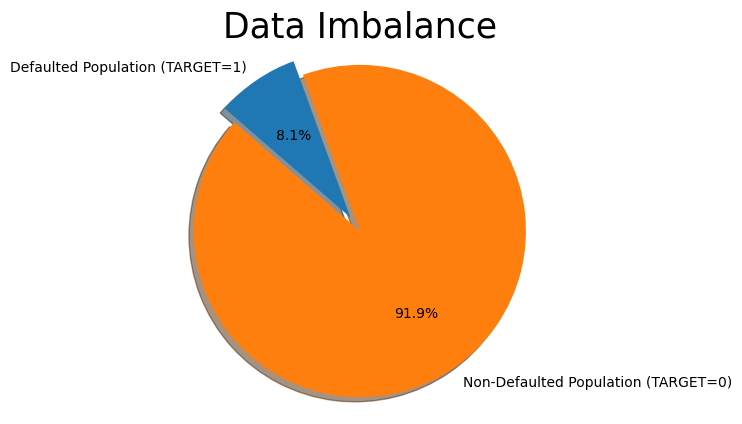

In [23]:
# Let’s check the distribution of the target variables.


# Count occurrences of each target value
target_counts = df1['TARGET'].value_counts(normalize=True) * 100

# Extract percentages

count1 = target_counts.get(1, 0)  # Percentage of TARGET=1
count0 = target_counts.get(0, 0)  # Percentage of TARGET=0

# Labels and values for the pie chart
x = ['Defaulted Population (TARGET=1)', 'Non-Defaulted Population (TARGET=0)']
y = [count1, count0]

# Pie chart settings
explode = (0.1, 0)  # Explode the first slice
fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%', shadow=True, startangle=110)
ax1.axis('equal')  # Ensures the pie chart is a perfect circle

# Title and display
plt.title('Data Imbalance', fontsize=25)
plt.show()


Defaulted population is 8.1 % and non- defaulted population is 91.9% .Ratio is 11.3

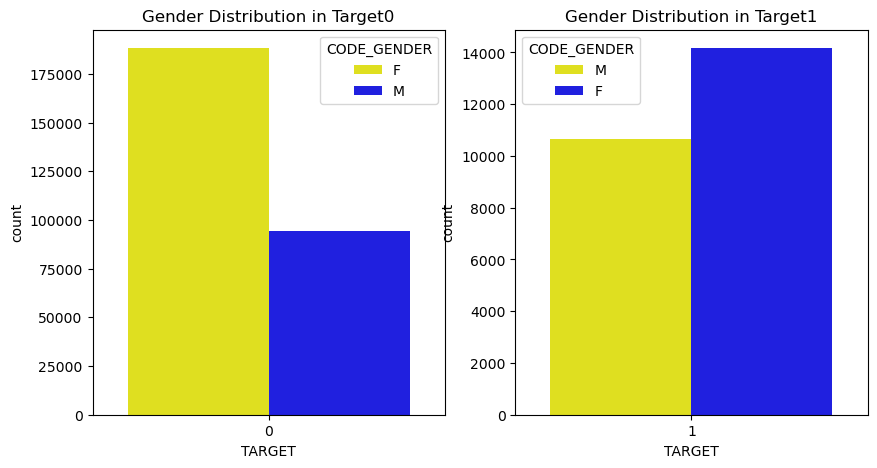

In [24]:
Target0 = df1[df1['TARGET'] == 0]
Target1 = df1[df1['TARGET'] == 1]

# Now, proceed with visualization
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.countplot(x='TARGET', hue='CODE_GENDER', data=Target0, palette=['yellow', 'blue'])
plt.title("Gender Distribution in Target0")

plt.subplot(122)
sns.countplot(x='TARGET', hue='CODE_GENDER', data=Target1, palette=['yellow', 'blue'])
plt.title("Gender Distribution in Target1")

plt.show()

More women than men applied for loans.

Among non-defaulters (people who paid their loans on time):
    
66.6% are women.

33.4% are men.

Among defaulters (people who failed to pay the loan):
    
57% are women.

42% are men.

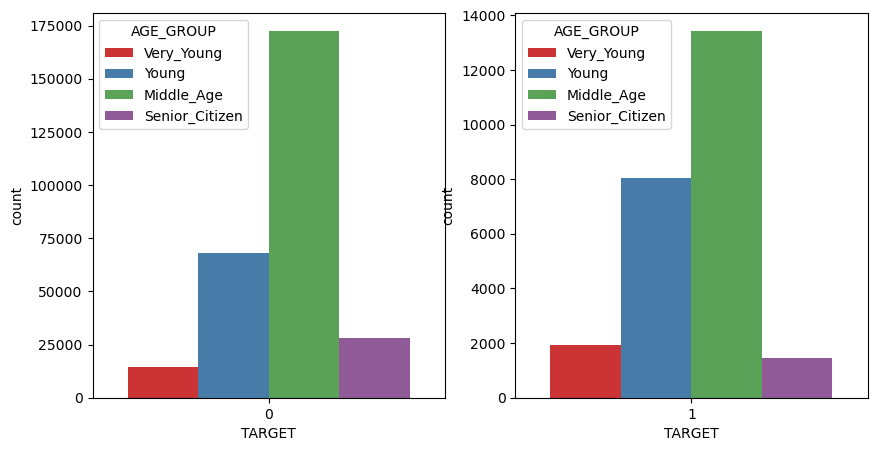

In [25]:
#Age Distribution based on Target 0 and Target 1

plt.figure(figsize=(10,5)) 
plt.subplot(121)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target0,palette='Set1')

plt.subplot(122)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target1,palette='Set1')
plt.show()

People aged 35-60 apply for loans more than any other age group.

This age group also struggles the most with loan repayments.

Senior citizens (60-100) and very young adults (19-25) have fewer repayment issues compared to others.

# Univariate Analysis

In [26]:
def plot_distribution(col):
    plt.figure(figsize=(20, 10))
    
# Plot for Non-Payment Difficulties (Target 0)
    plt.subplot(1, 2, 1)
    sns.histplot(Target0[col], color="green", kde=True)
    plt.xlabel(col, fontsize=20, fontweight="bold")
    plt.ylabel('Non-Payment Difficulties', fontsize=20, fontweight="bold")
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)

# Plot for Payment Difficulties (Target 1)
    plt.subplot(1, 2, 2)
    sns.histplot(Target1[col], color="red", kde=True)
    plt.xlabel(col, fontsize=20, fontweight="bold")
    plt.ylabel('Payment Difficulties', fontsize=20, fontweight="bold")
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)

    plt.tight_layout()
    plt.show()


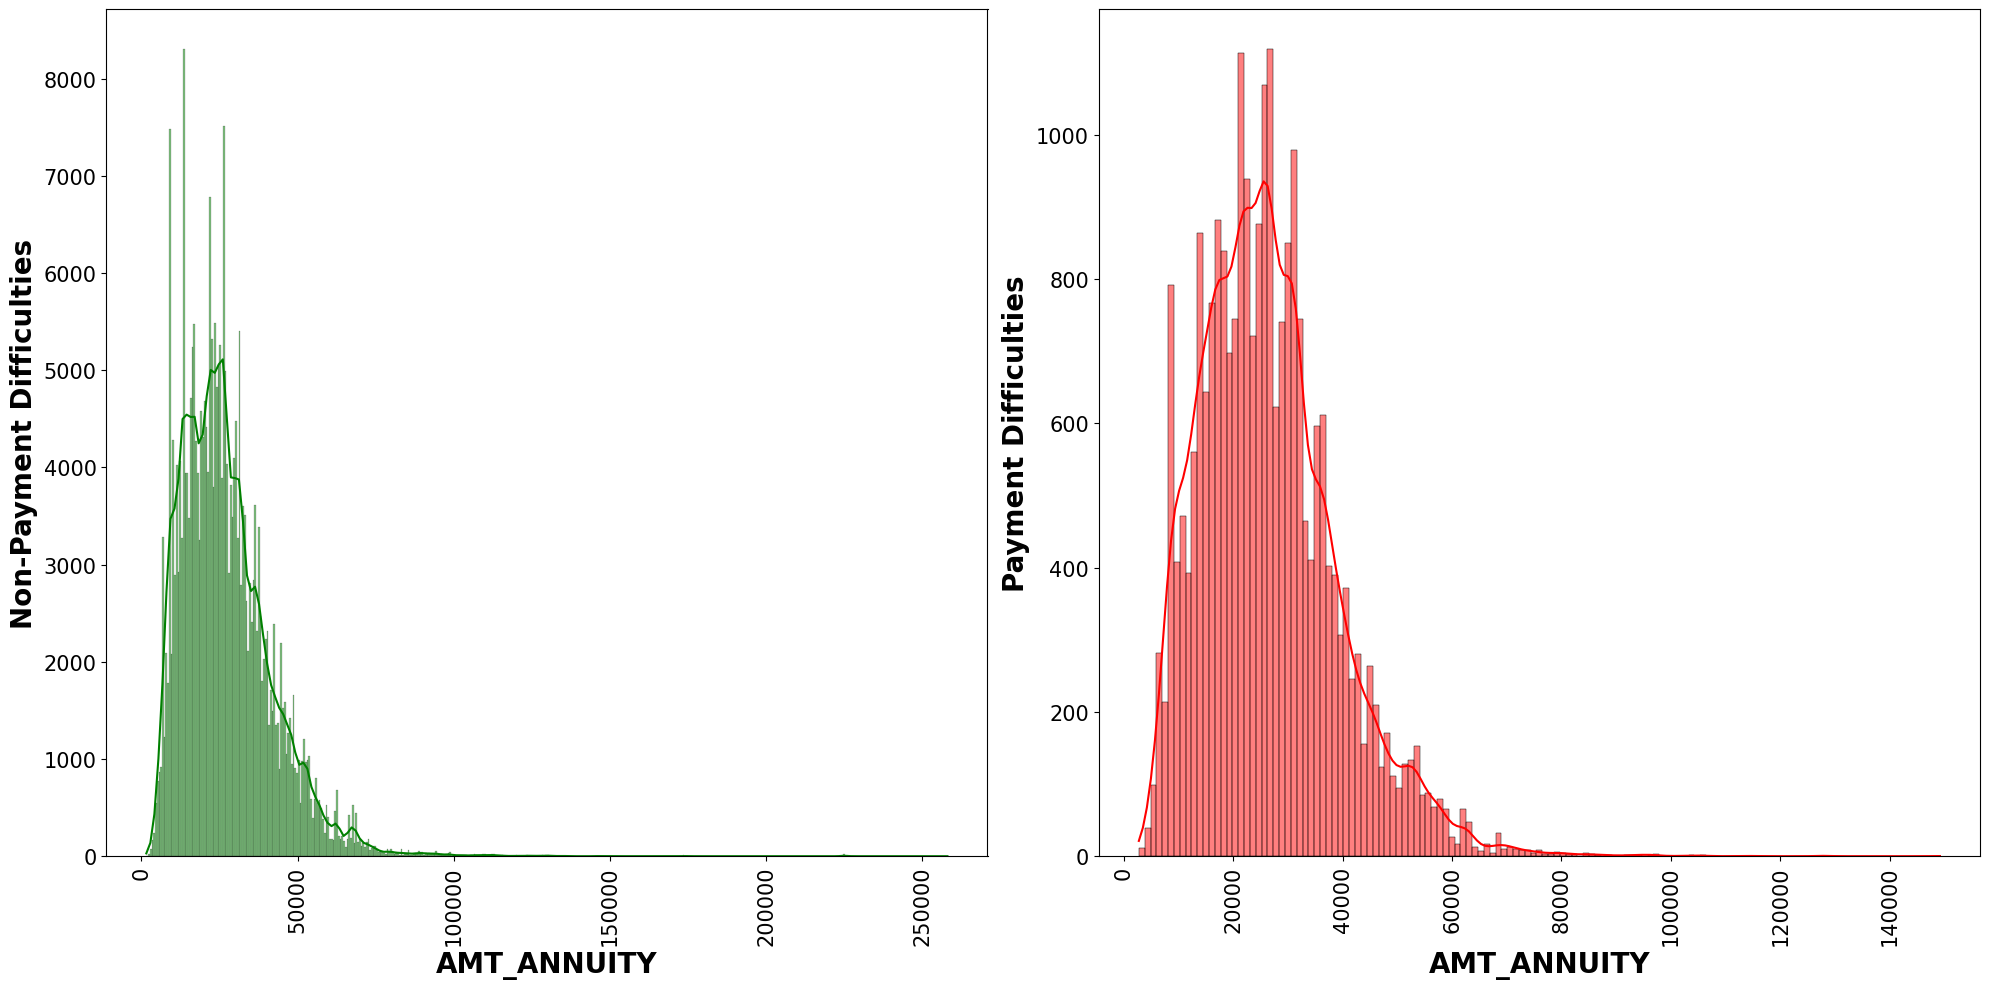

In [27]:
plot_distribution(col='AMT_ANNUITY')

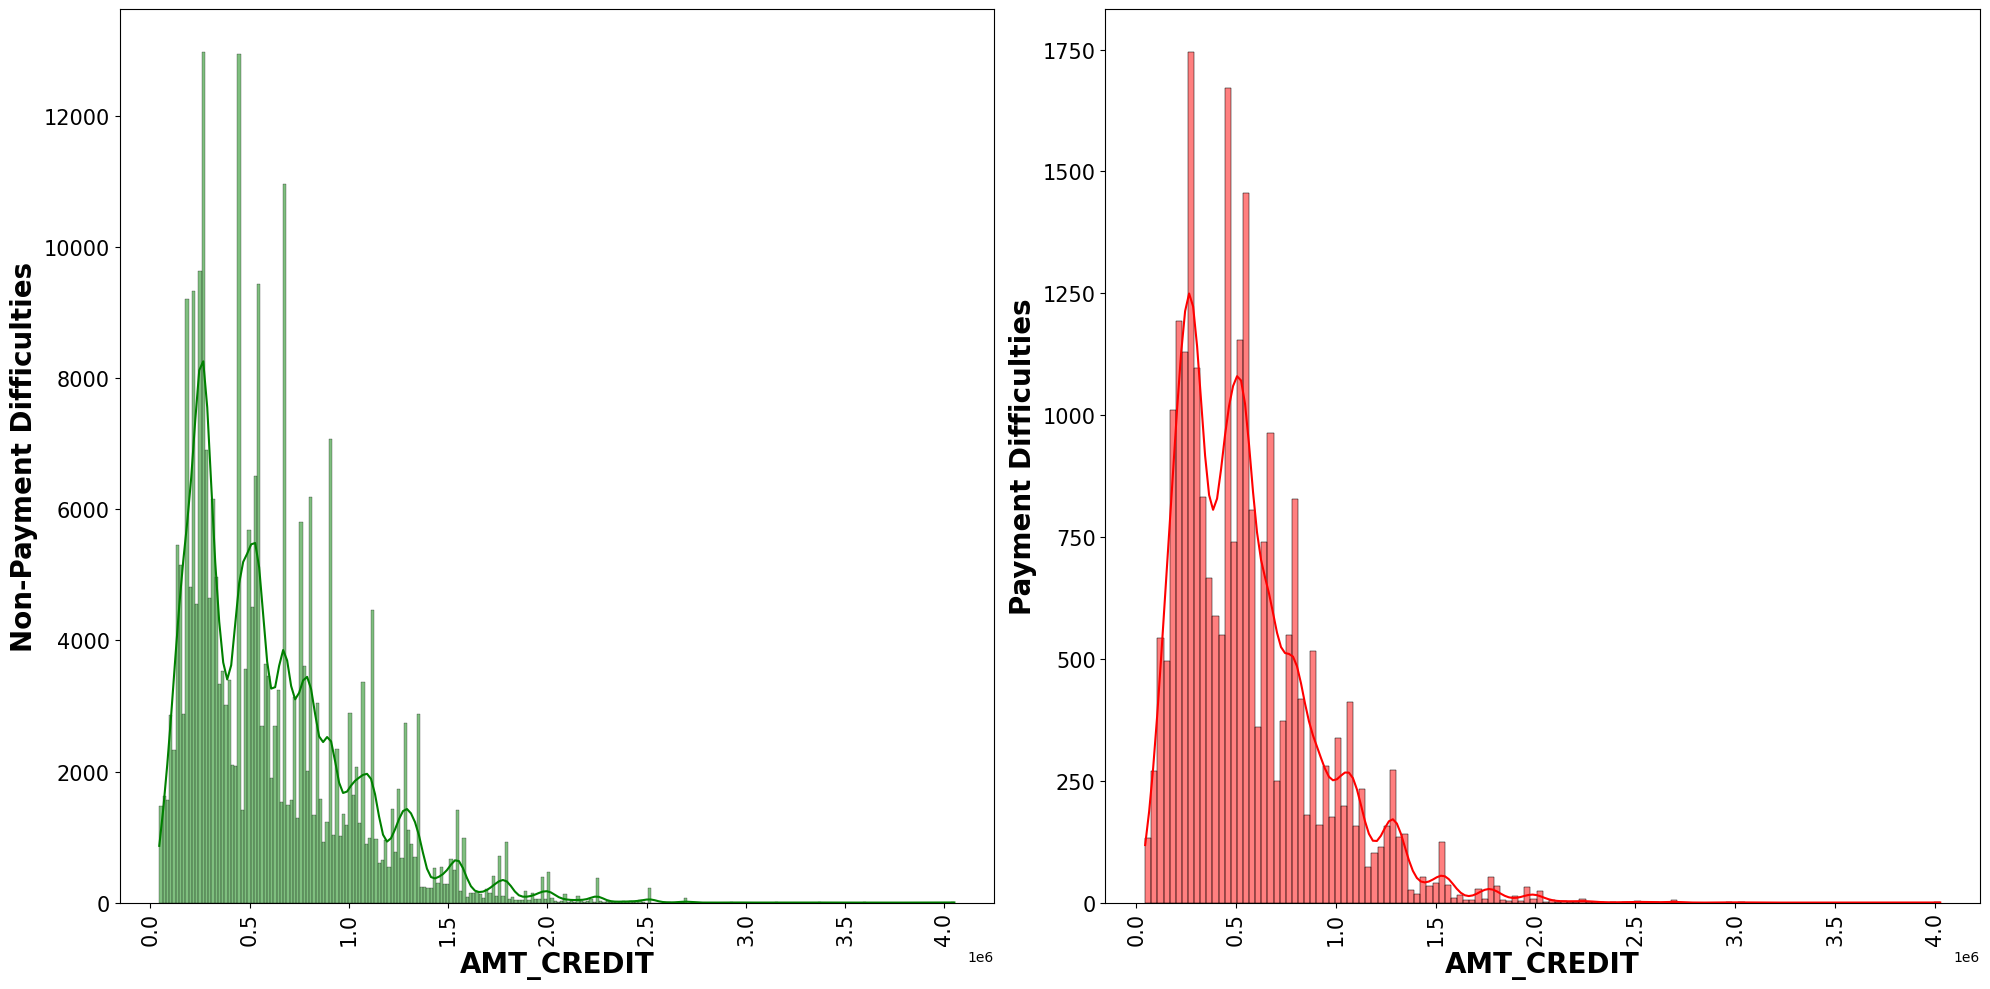

In [28]:
plot_distribution(col='AMT_CREDIT')

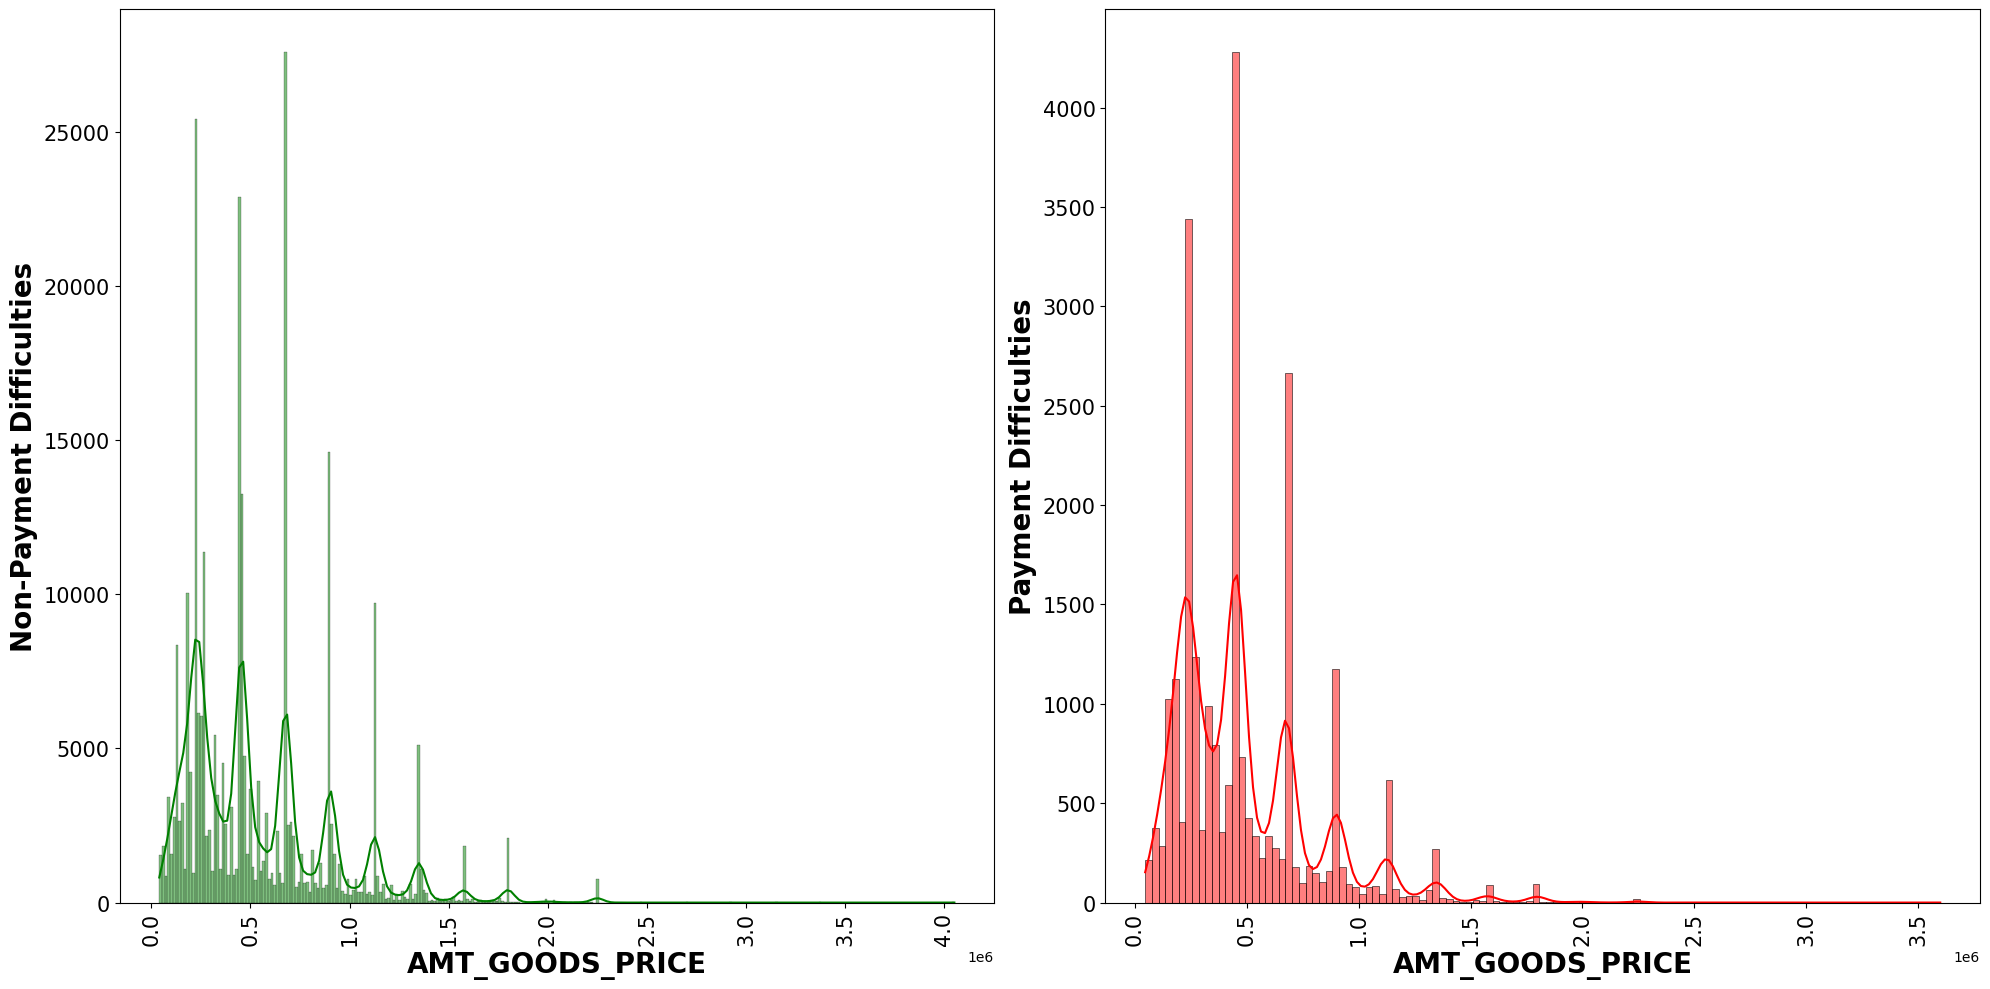

In [29]:
plot_distribution(col='AMT_GOODS_PRICE')

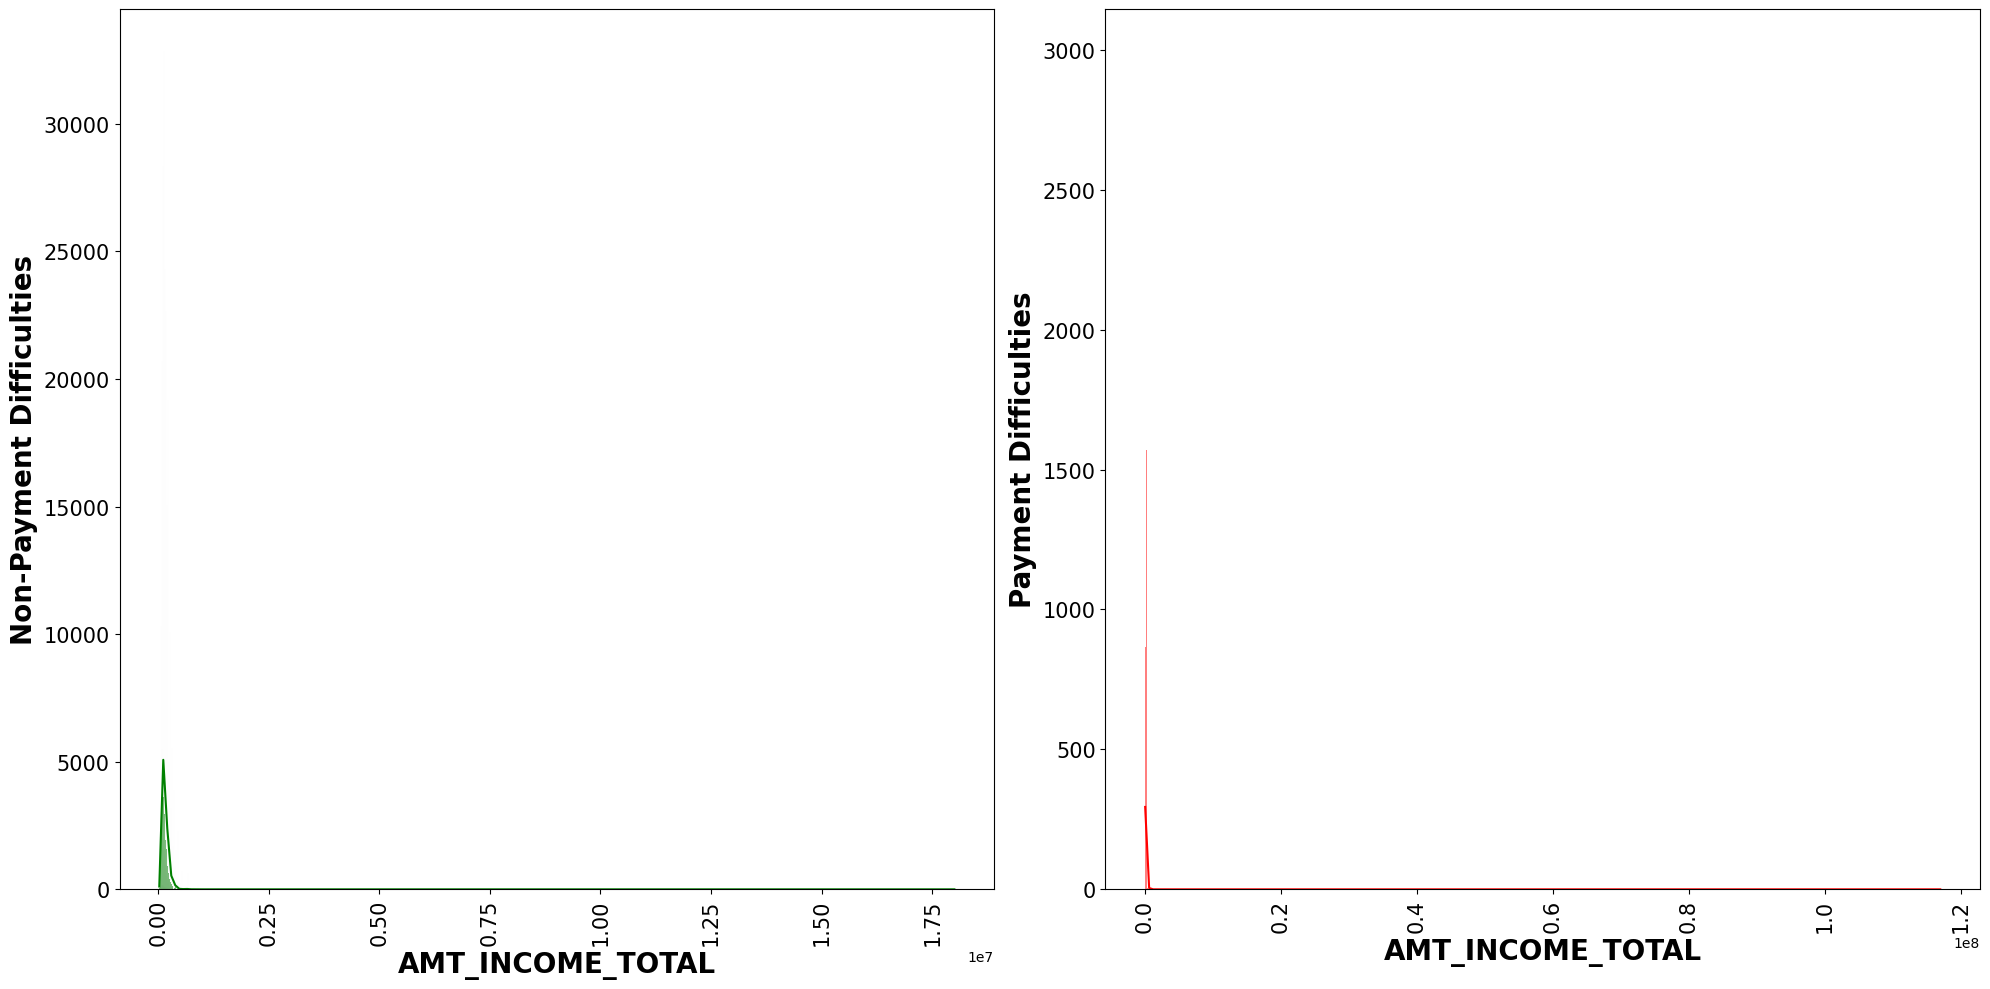

In [30]:
plot_distribution(col='AMT_INCOME_TOTAL')

# Bivariate Analysis

In [31]:
df1[["TARGET","AMT_INCOME_TOTAL","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS"]]


TARGET  AMT_INCOME_TOTAL            NAME_EDUCATION_TYPE  \
0            1          202500.0  Secondary / secondary special   
1            0          270000.0               Higher education   
2            0           67500.0  Secondary / secondary special   
3            0          135000.0  Secondary / secondary special   
4            0          121500.0  Secondary / secondary special   
...        ...               ...                            ...   
307506       0          157500.0  Secondary / secondary special   
307507       0           72000.0  Secondary / secondary special   
307508       0          153000.0               Higher education   
307509       1          171000.0  Secondary / secondary special   
307510       0          157500.0               Higher education   

          NAME_FAMILY_STATUS  
0       Single / not married  
1                    Married  
2       Single / not married  
3             Civil marriage  
4       Single / not married  
...                      ...  
307506             Separated  
307507                 Widow  
307508             Separated  
307509               Married  
307510               Married  

[307511 rows x 4 columns]

Income amount:: Education status :: Family Status

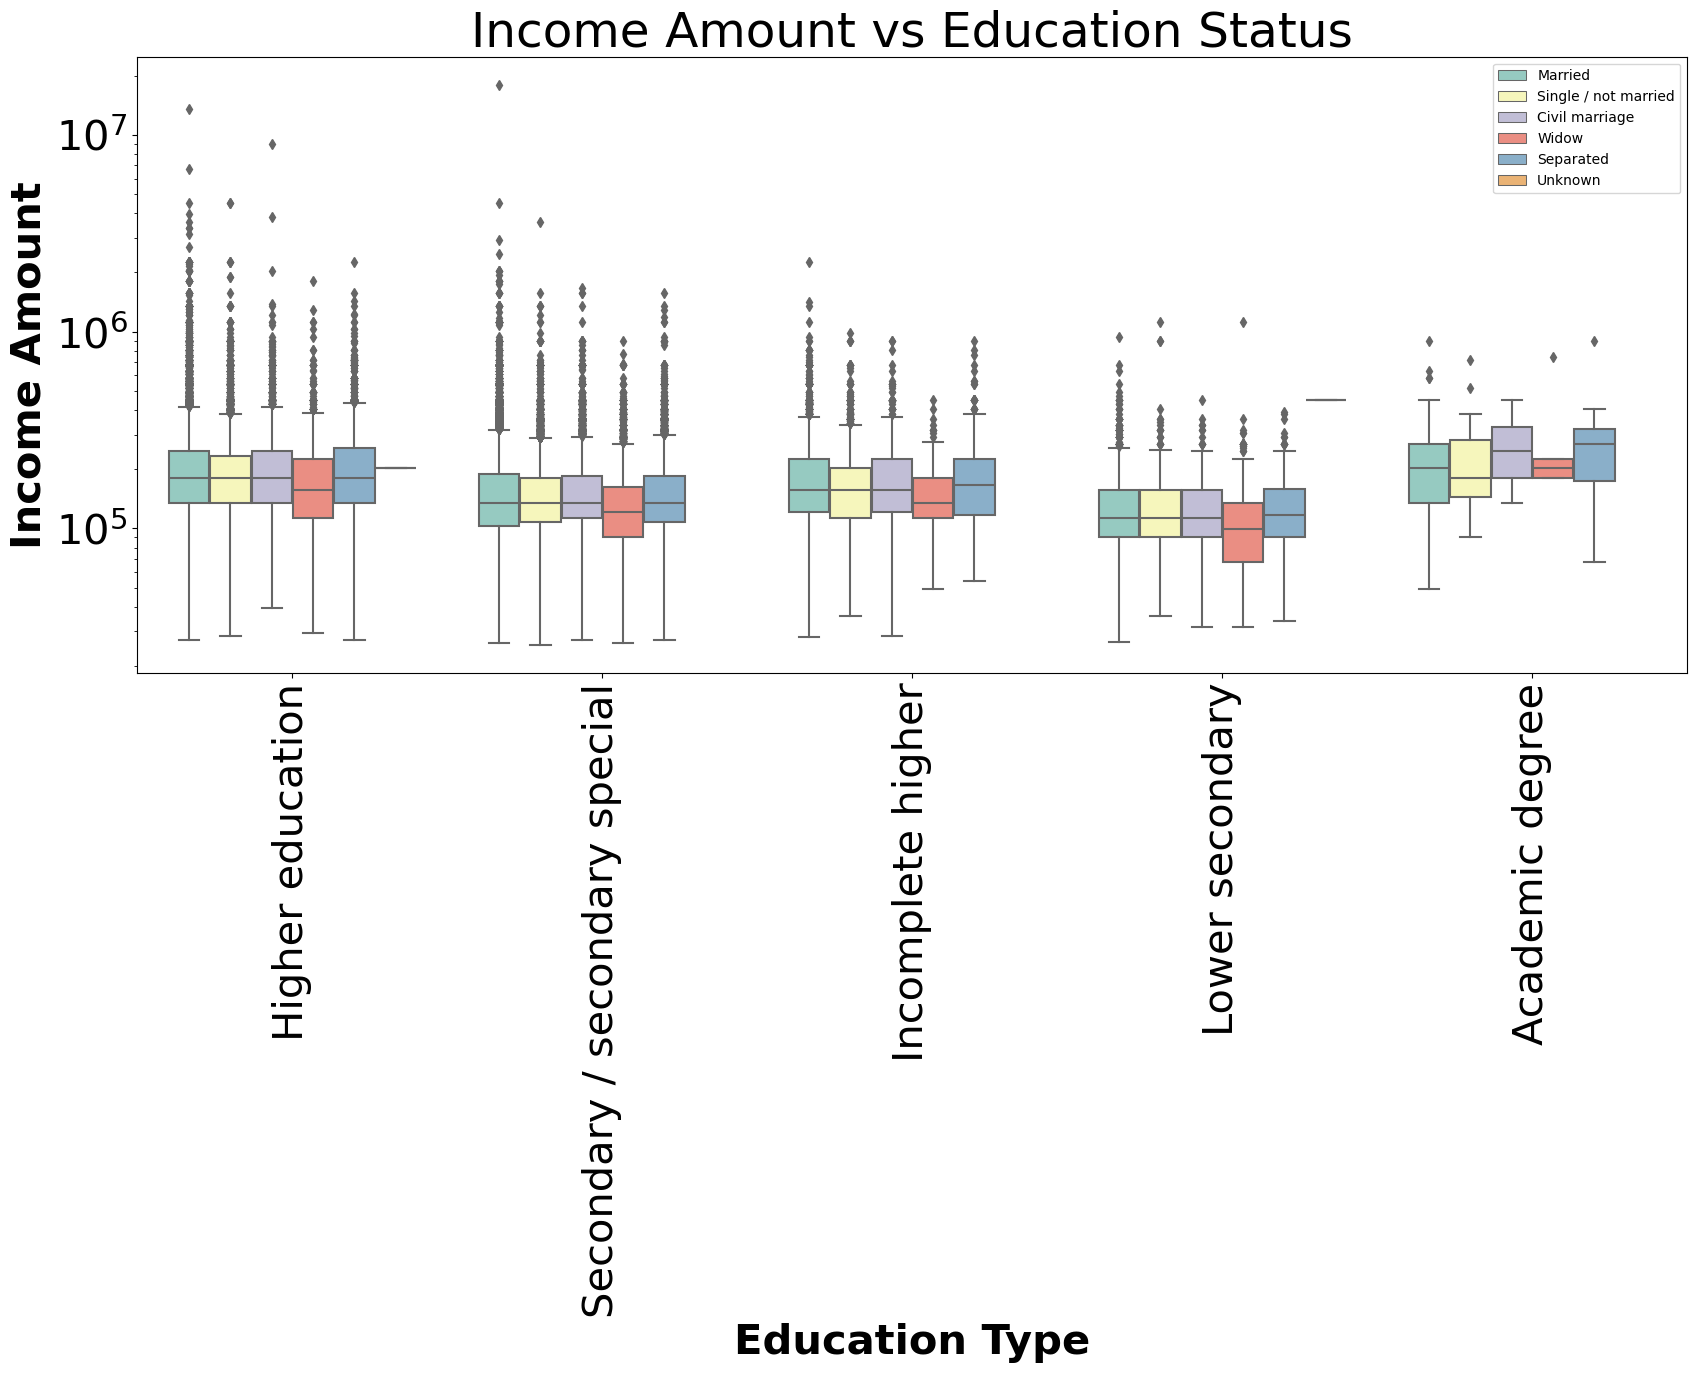

In [32]:
plt.figure(figsize=(20, 8))
plt.yscale('log')

sns.boxplot(
    data=Target0, 
    x='NAME_EDUCATION_TYPE', 
    y='AMT_INCOME_TOTAL',    
    hue='NAME_FAMILY_STATUS', 
    palette='Set3'
)

plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)
plt.title('Income Amount vs Education Status', fontsize=35)
plt.xlabel("Education Type", fontsize=30, fontweight="bold")
plt.ylabel("Income Amount", fontsize=30, fontweight="bold")
plt.legend(loc='upper right')

plt.show()

Credit Amount :: Education Status:: Family Status

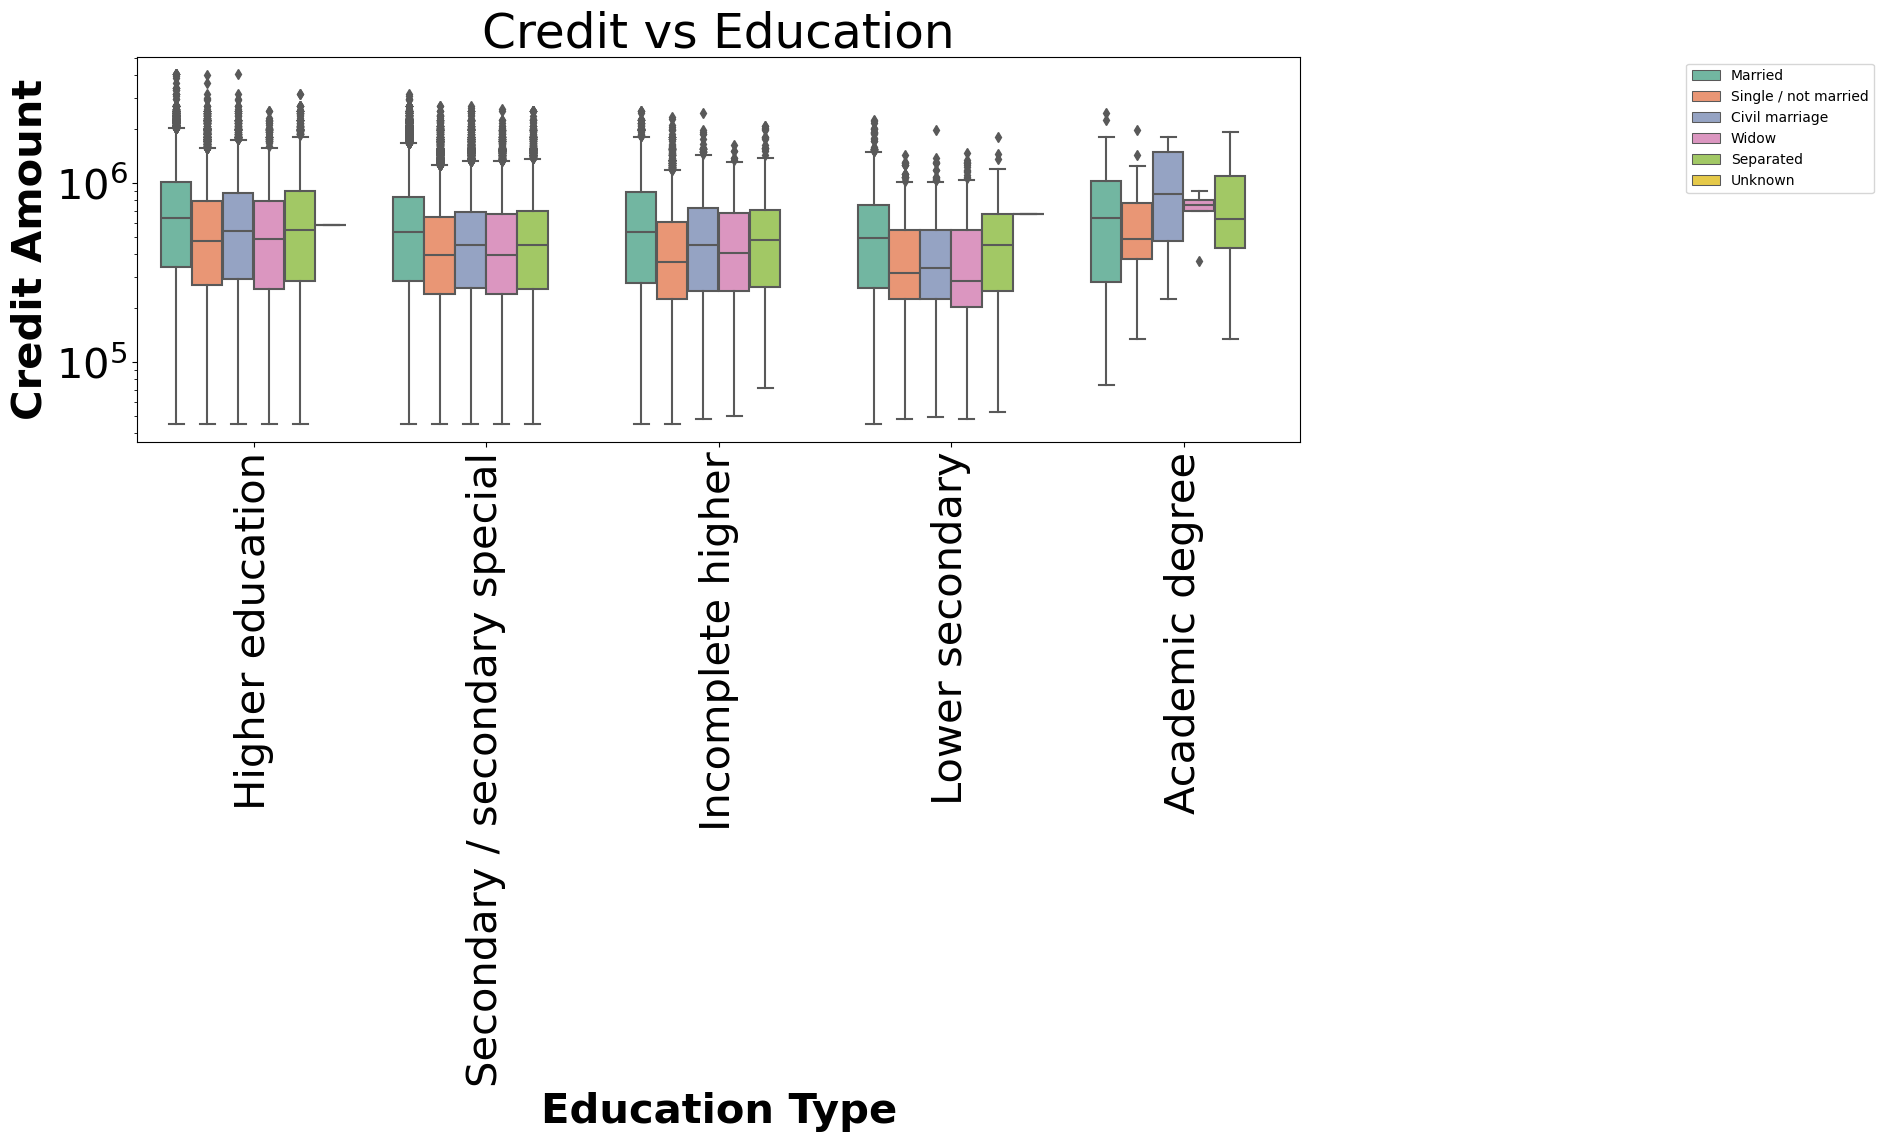

In [33]:
plt.figure(figsize=(15, 5))
plt.yscale('log')   
plt.xticks(rotation=90)

sns.boxplot(data=Target0, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT',  
            hue='NAME_FAMILY_STATUS', palette='Set2')

plt.legend(bbox_to_anchor=(1.5, 1))  # Adjust legend position
plt.title('Credit vs Education', fontsize=35)
plt.xlabel("Education Type", fontsize=30, fontweight="bold")
plt.ylabel("Credit Amount", fontsize=30, fontweight="bold")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.show()


Credit Amount :: Education Status :: Family Status

Most clients, except those with an Academic degree, have many extreme credit values (outliers).

The majority of clients have a credit amount that falls in the lowest 25% of the range.

Widowed clients with a college degree tend to take higher loan amounts.

Some clients with higher education, incomplete higher education, lower secondary, and secondary/special education are more likely to take loans.

Incom Amount :: Education Status :: Payment Difficulties 

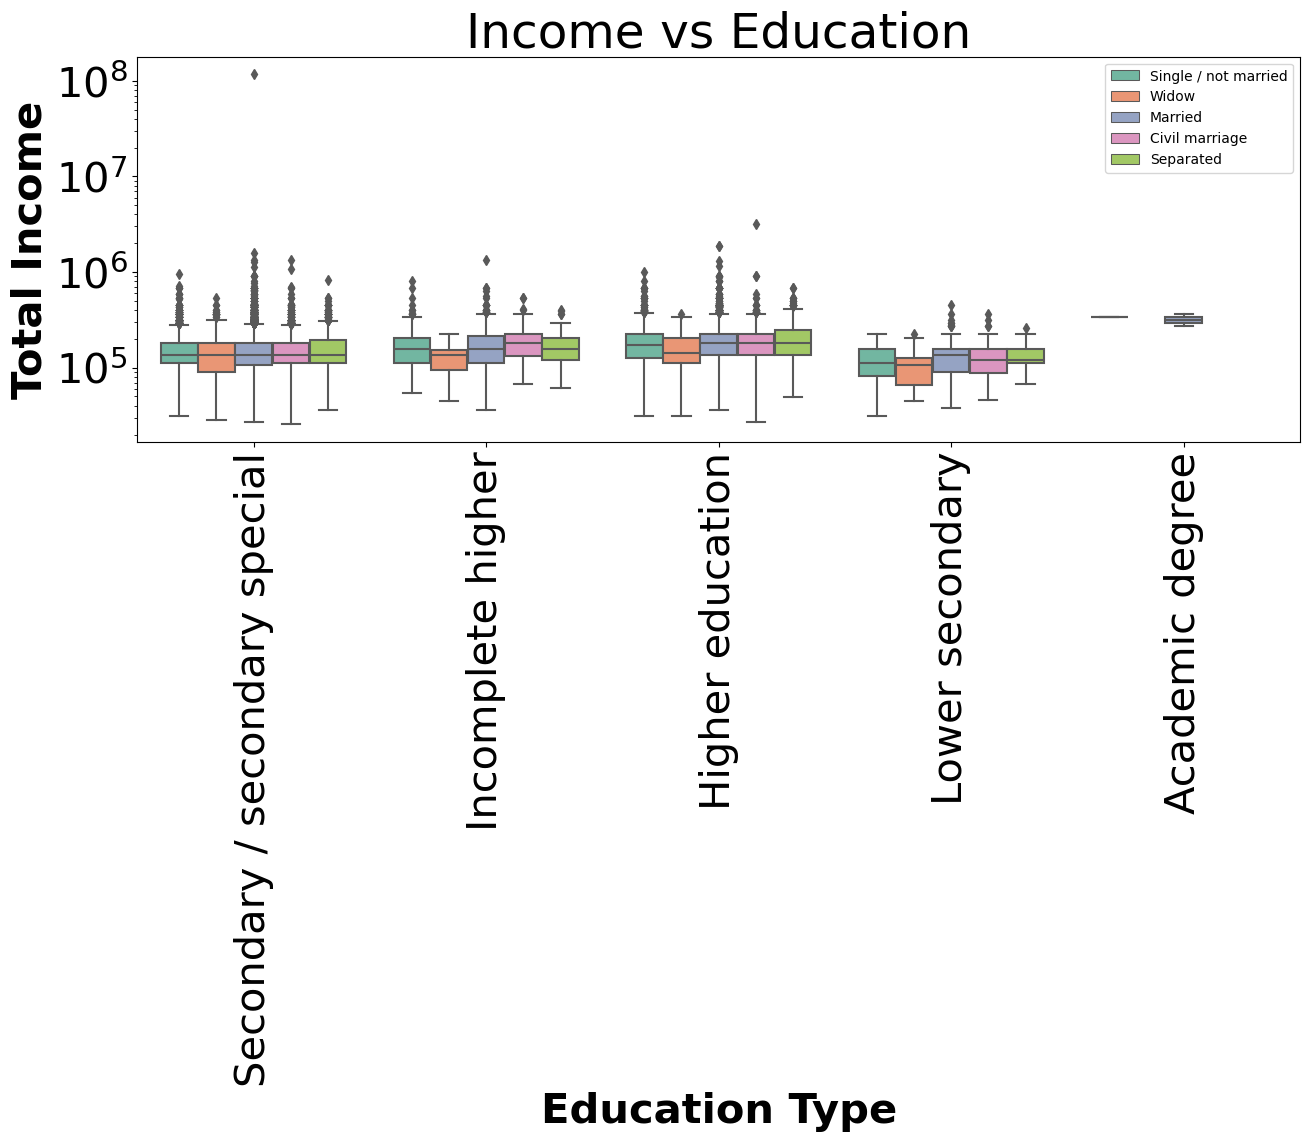

In [34]:
plt.figure(figsize=(15, 5))
plt.yscale('log')   
plt.xticks(rotation=90)

sns.boxplot(data=Target1, x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL',  
            hue='NAME_FAMILY_STATUS', palette='Set2')

plt.legend(loc='upper right')
plt.title('Income vs Education', fontsize=35)
plt.xlabel("Education Type", fontsize=30, fontweight="bold")
plt.ylabel("Total Income", fontsize=30, fontweight="bold")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.show()


Clients with an academic degree earn less than others.

Defaulters generally have lower incomes compared to non-defaulters.

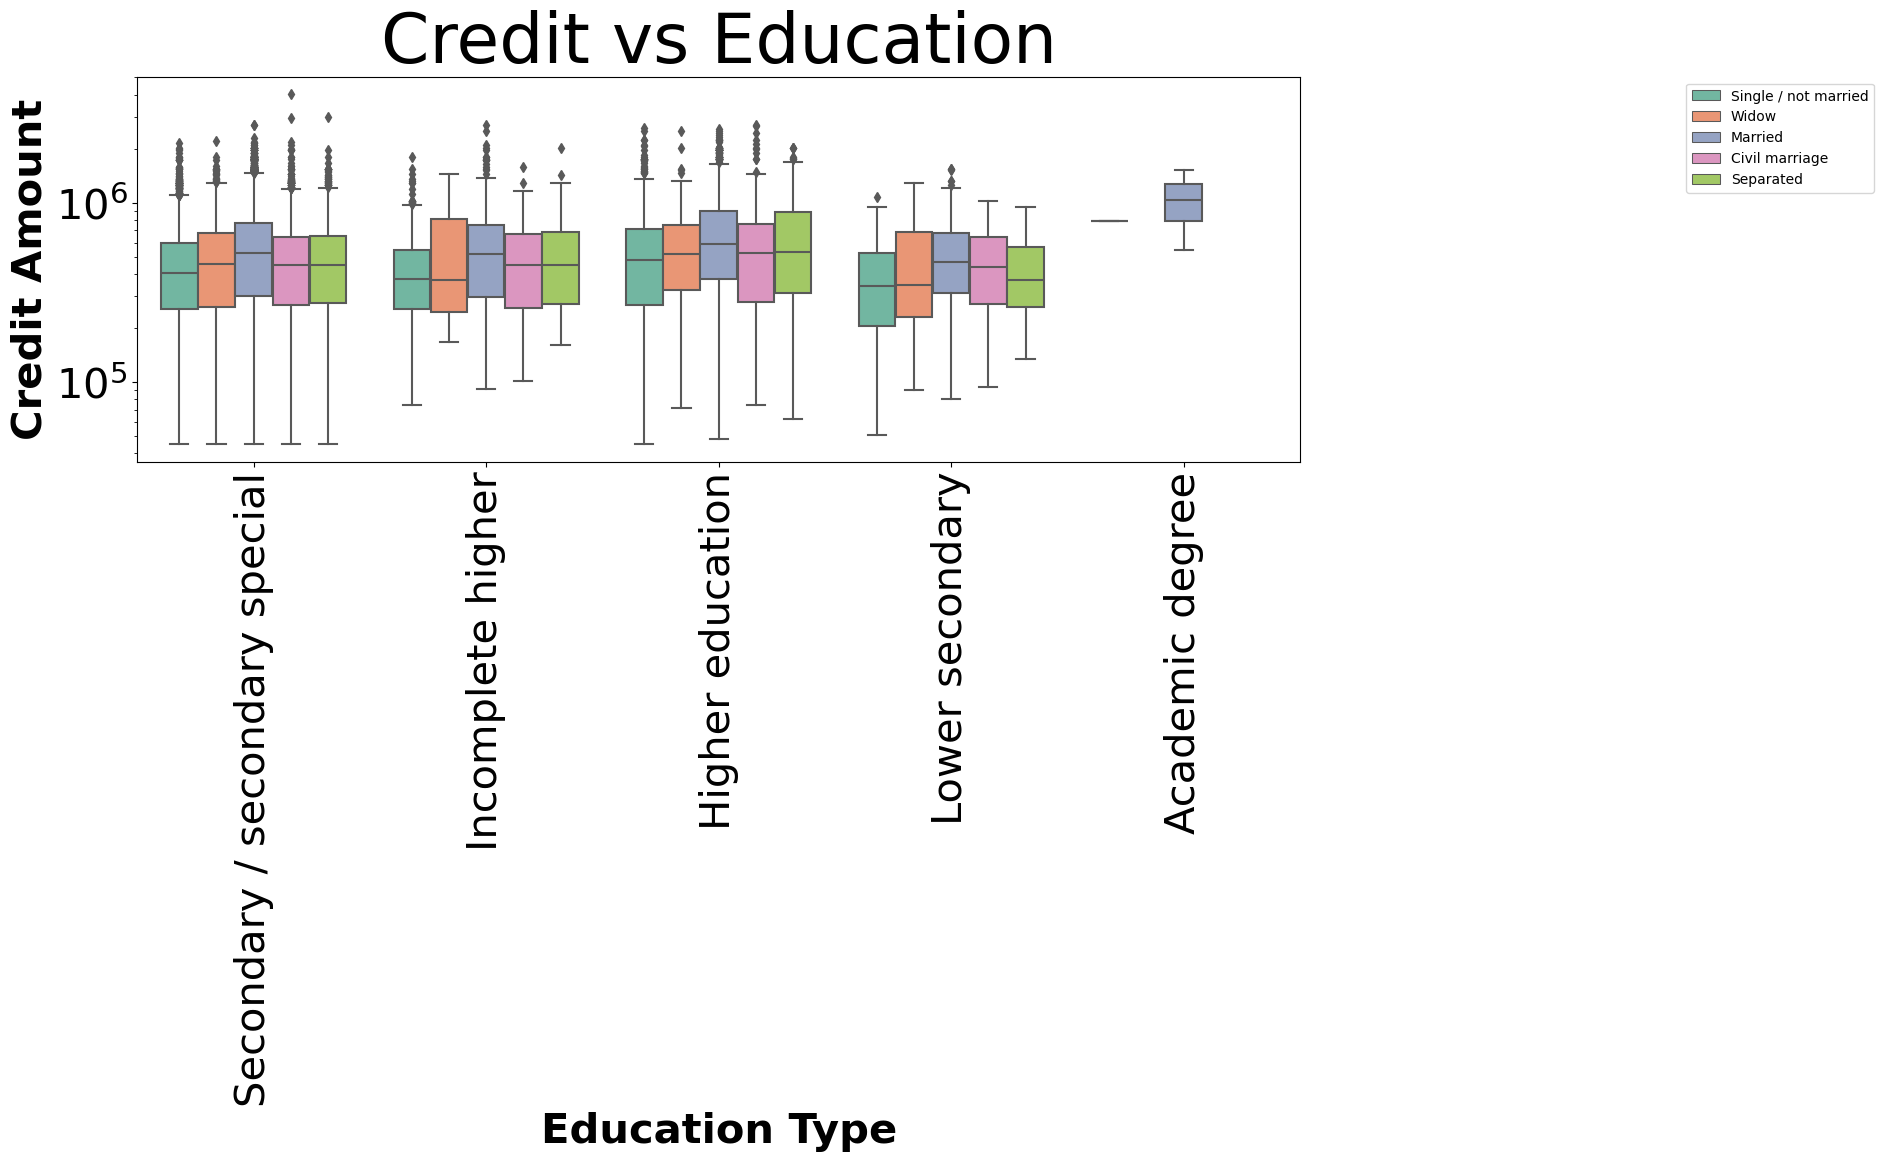

In [35]:
plt.figure(figsize=(15, 5))
plt.yscale('log')   
plt.xticks(rotation=90, fontsize=30)  
plt.yticks(fontsize=30)  

sns.boxplot(data=Target1, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT',   
            hue='NAME_FAMILY_STATUS', palette='Set2')  

plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right')  
plt.title('Credit vs Education', fontsize=50)  
plt.xlabel("Education Type", fontsize=30, fontweight="bold")  
plt.ylabel("Credit Amount", fontsize=30, fontweight="bold")  

plt.show()


Married clients with academic degrees take higher credit loans and have no unusual values (outliers).

Single clients with academic degrees have very little variation in credit amounts and no outliers.

Clients with higher education, incomplete higher education, lower secondary education, and secondary/special education are more likely to take large credit loans.

# Correlation B/W numerical variable using Pair Plots

To Check Numerical Columns 

In [36]:
numerical_col = df1.select_dtypes(include='number').columns
print(numerical_col)
len(numerical_col)

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')


35

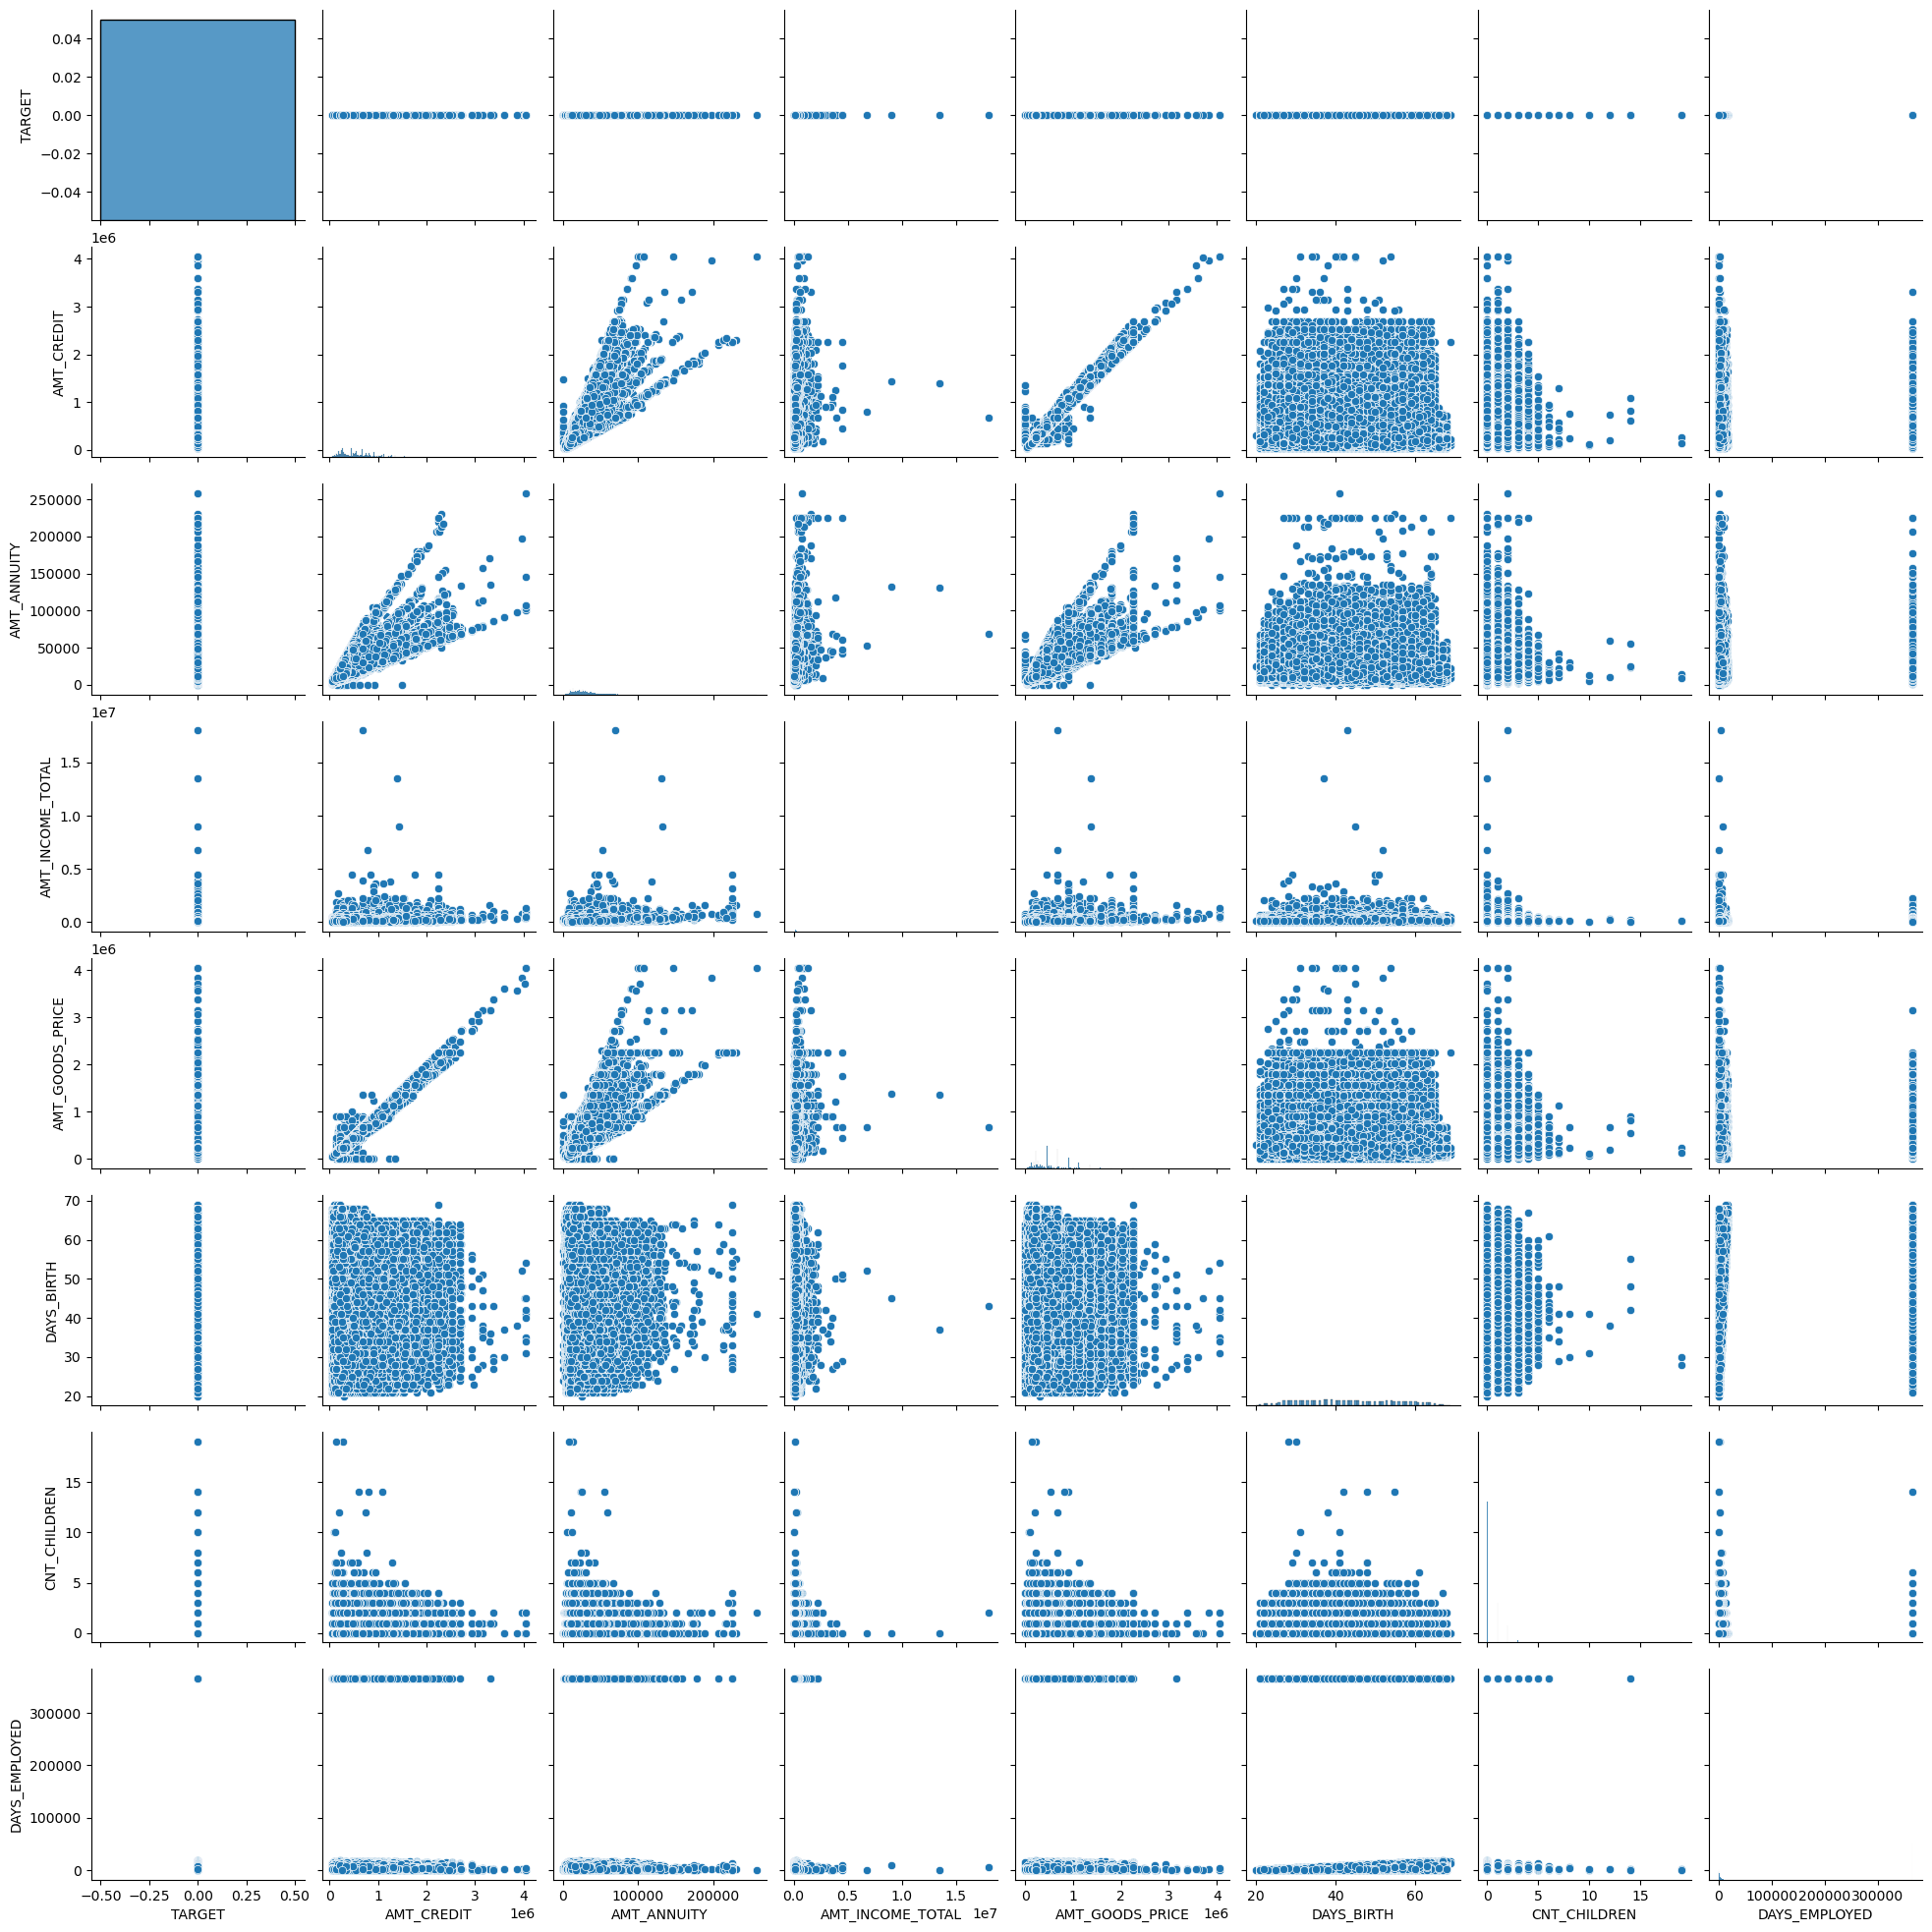

In [37]:
pair = Target0[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()

Pairplot with Loan payment difficulties 

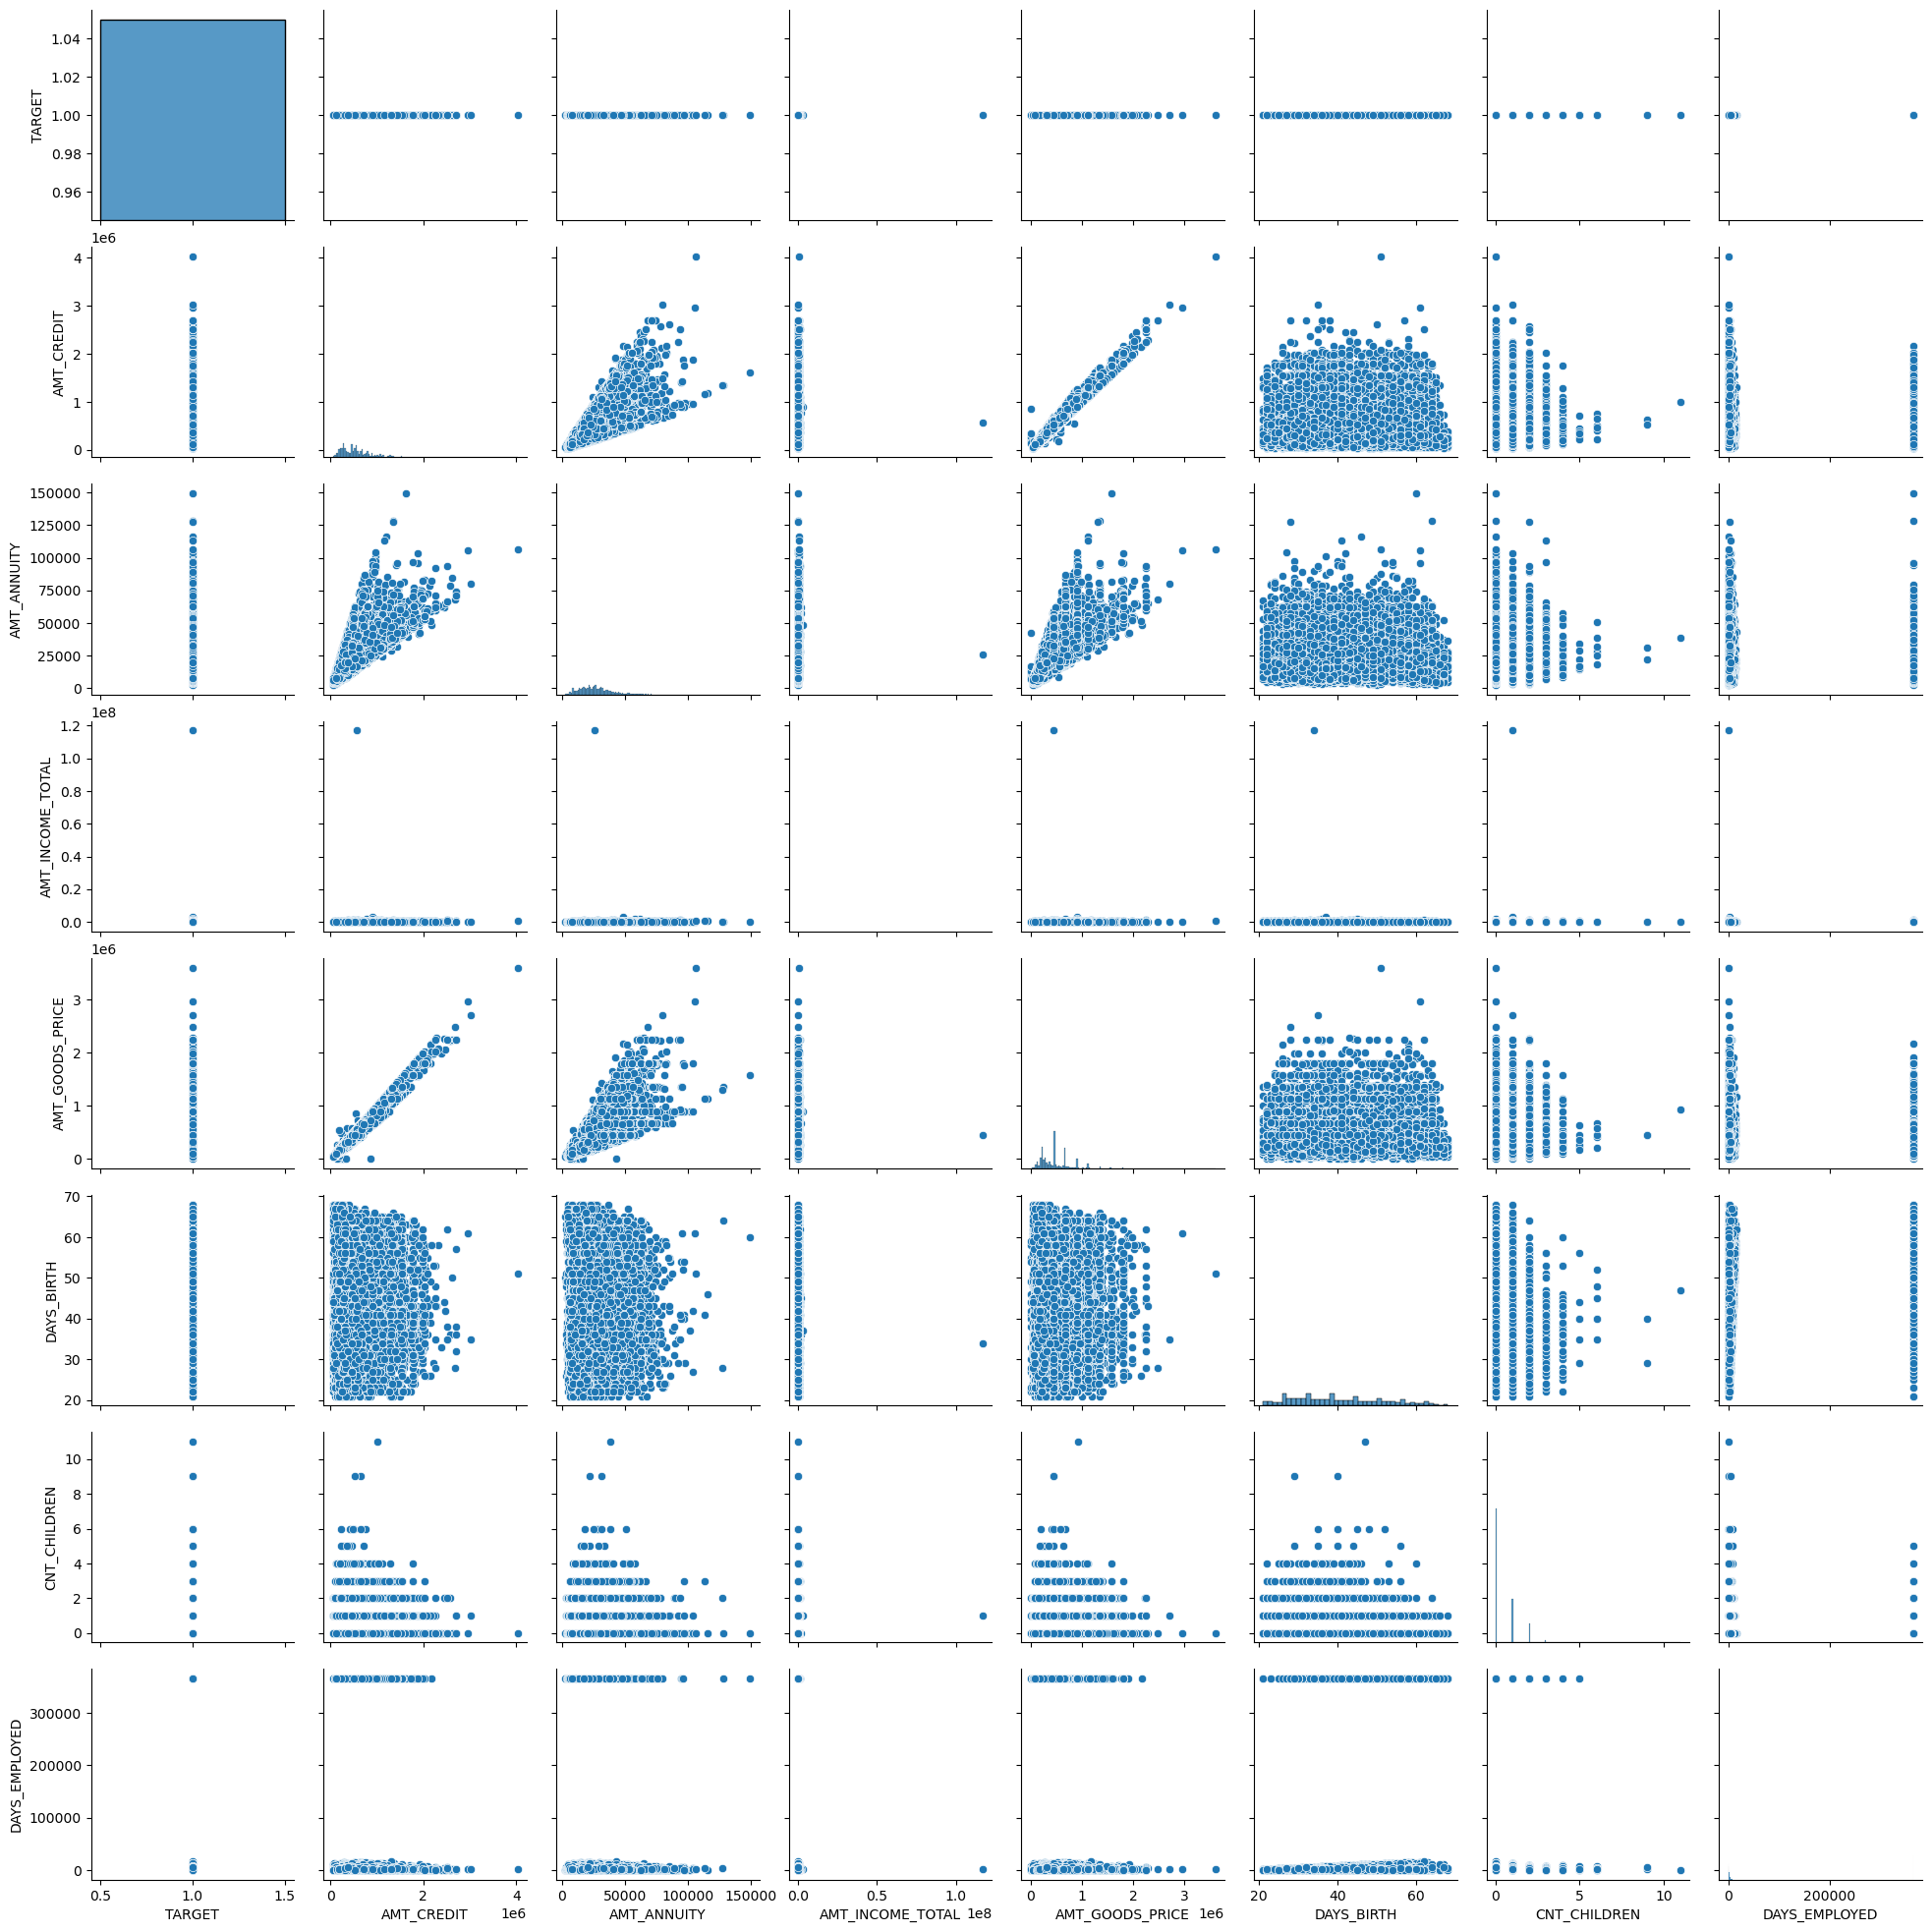

In [38]:
pair = Target1[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()

Loan amount and home price are closely related for both defaulters and non-defaulters. As home prices go up, loan amounts also increase.

Loan amount and EMI (monthly payment) are also strongly connected. Higher home prices lead to higher EMIs, which makes sense.

Loan amount, home price, and EMI are all highly correlated. This means they may not be the best indicators for detecting patterns in a heatmap.


# Correlations

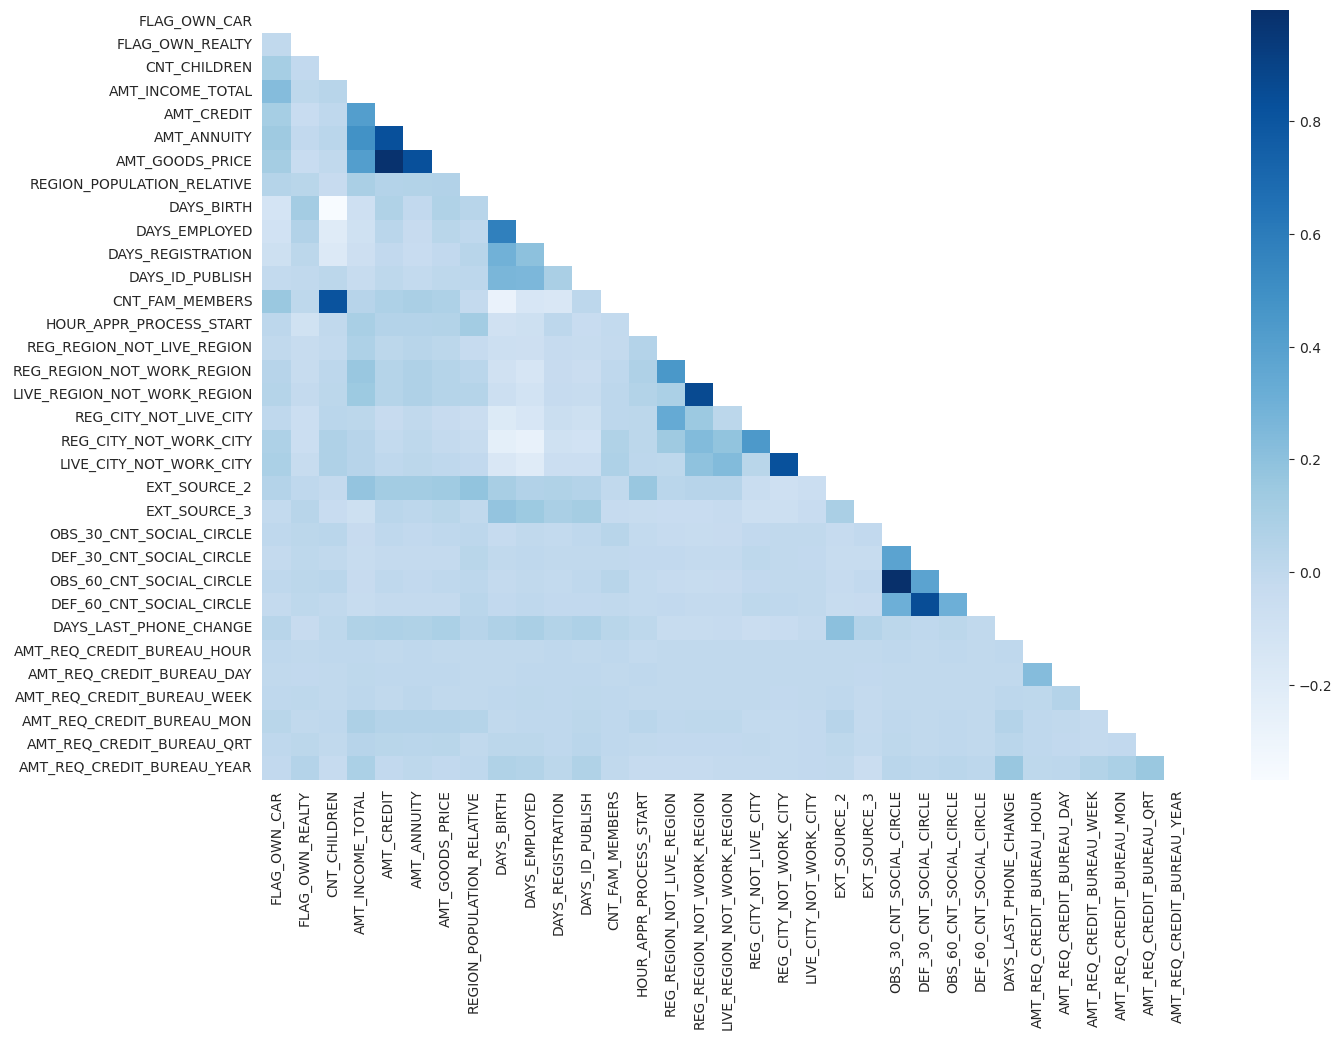

In [39]:
# Selecting only numeric columns
corr0 = df1.iloc[:, 2:].select_dtypes(include=['number'])
corr1 = df1.iloc[:, 2:].select_dtypes(include=['number'])

# Calculating correlation
t0 = corr0.corr(method='spearman')  # Correlation for target 0
t1 = corr1.corr(method='spearman')  # Correlation for target 1

def targets_corr(data, title):
    plt.figure(figsize = (15, 10))
    
    mask = np.zeros_like(data)
    mask[np.triu_indices_from(mask)]=True
    with sns.axes_style("white"):
        ax = sns.heatmap(data, mask = mask, cmap='Blues')
targets_corr(data=t0,title='Correlation for Target 0')


Younger people take bigger loans – As age decreases, loan amounts increase.

Fewer children = Bigger loans – People with fewer children take higher credit amounts.

Fewer children = Higher income – People with fewer kids tend to have more income.

Densely populated areas = Fewer children – Families in crowded places tend to have fewer kids.

Densely populated areas = Higher loans – People living in crowded areas take bigger loans.

Densely populated areas = Higher income – People in such areas also earn more.

# Overall Conclusion & Insights

Income & Credit Relationship: Higher credit amounts are taken by younger individuals and those with fewer children.

Default Risk: Clients with lower income and higher credit amounts are more likely to default.

Address Mismatch & Default Probability: Clients whose permanent address does not match their contact/work address tend to have higher risk levels.

Loan Amount & EMI Correlation: As home prices increase, both loan amounts and EMIs rise proportionally for both defaulters and non-defaulters.

Population Density & Loan Behavior: Clients in densely populated areas tend to have higher credit amounts and income levels.

Recommendations for Loan Approval Strategy:
    
    
    
Approve Loans for:
    

Clients with stable income, fewer financial liabilities, and a matching address history.

Individuals with higher education and a history of responsible borrowing.



Reject or Apply Higher Interest Rates for:
    

Clients with low income and high loan amounts (higher risk).

Those with frequent address mismatches (potential instability).

Borrowers with high debt-to-income ratios and multiple active loans.



Risk-Based Pricing:

Low-risk clients: Offer lower interest rates to attract responsible borrowers.
    
Medium-risk clients: Provide loans with moderate interest rates but strict repayment terms.
    
High-risk clients: Either reject the application or apply higher interest rates and stricter collateral requirements.
    
 

# Prediction for previous application data 

In [40]:
# Check the shape and display the first few rows
print("Shape of df2:", df2.shape)
print(df2.head())

print(df2.info())
print(df2.describe())



Shape of df2: (1670214, 37)
   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  

In [41]:
# Calculate and display percentage of missing values for each column

missing_df2 = df2.isnull().sum() / len(df2) * 100
print("Missing Value Percentages (Top 50):")
print(missing_df2.sort_values(ascending=False).head(50))



Missing Value Percentages (Top 50):
RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY  

Data Cleaning & Preprocessing

In [42]:
# Drop columns with more than 40% missing values

cols_to_drop = missing_df2[missing_df2 > 40].index
df2.drop(labels=cols_to_drop, axis=1, inplace=True)
print("Shape after dropping high-missing columns:", df2.shape)

Shape after dropping high-missing columns: (1670214, 26)


In [43]:
# Impute missing values for numeric columns with median

numeric_cols_df2 = df2.select_dtypes(include='number').columns
for col in numeric_cols_df2:
    df2[col].fillna(df2[col].median(), inplace=True)
    
# Impute missing values for categorical columns with mode
categorical_cols_df2 = df2.select_dtypes(include='object').columns
for col in categorical_cols_df2:
    df2[col].fillna(df2[col].mode()[0], inplace=True)



In [44]:
# Convert Negative Values for Time/Date Columns

# Identify all columns that start with 'DAYS'
time_cols = [col for col in df2.columns if col.startswith('DAYS')]

# Convert negative values to positive using the absolute value
df2[time_cols] = df2[time_cols].abs()

# Verify the conversion by displaying summary statistics for the time columns
print(df2[time_cols].describe())


       DAYS_DECISION
count   1.670214e+06
mean    8.806797e+02
std     7.790997e+02
min     1.000000e+00
25%     2.800000e+02
50%     5.810000e+02
75%     1.300000e+03
max     2.922000e+03


# Univariate Analysis

In [45]:
    def plot_distribution_df2(col, hue=None):
        plt.figure(figsize=(20, 10))
    

Plot overall distribution using histogram and KDE

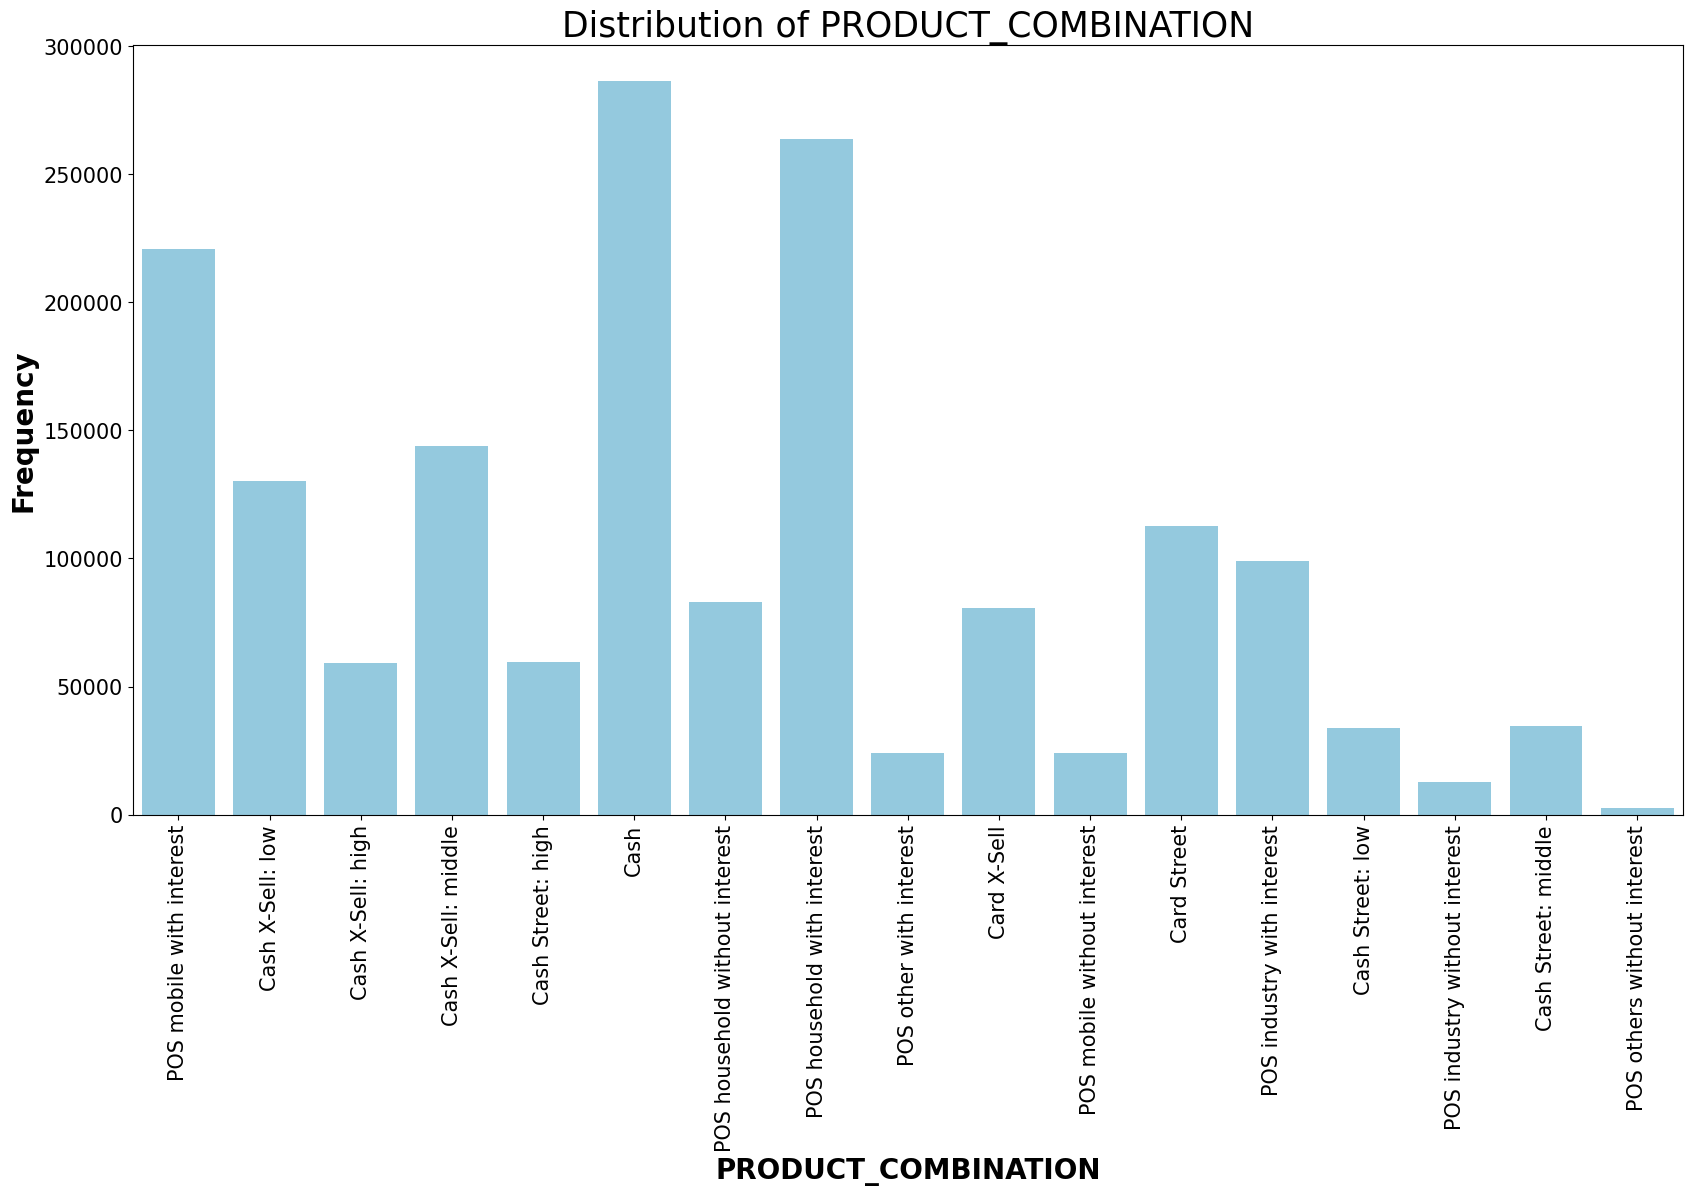

In [46]:
plt.figure(figsize=(20, 10))
sns.countplot(x='PRODUCT_COMBINATION', data=df2, color="skyblue")
plt.xlabel("PRODUCT_COMBINATION", fontsize=20, fontweight="bold")
plt.ylabel("Frequency", fontsize=20, fontweight="bold")
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.title("Distribution of PRODUCT_COMBINATION", fontsize=25)
plt.show()


In [47]:
# Define a function to plot the distribution of a numeric column in previous application data set

def plot_distribution_df2(col):
    plt.figure(figsize=(20, 10))
    sns.histplot(df2[col], color="skyblue", kde=True)
    plt.xlabel(col, fontsize=20, fontweight="bold")
    plt.ylabel('Frequency', fontsize=20, fontweight="bold")
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f"Distribution of {col}", fontsize=25)
    plt.show()

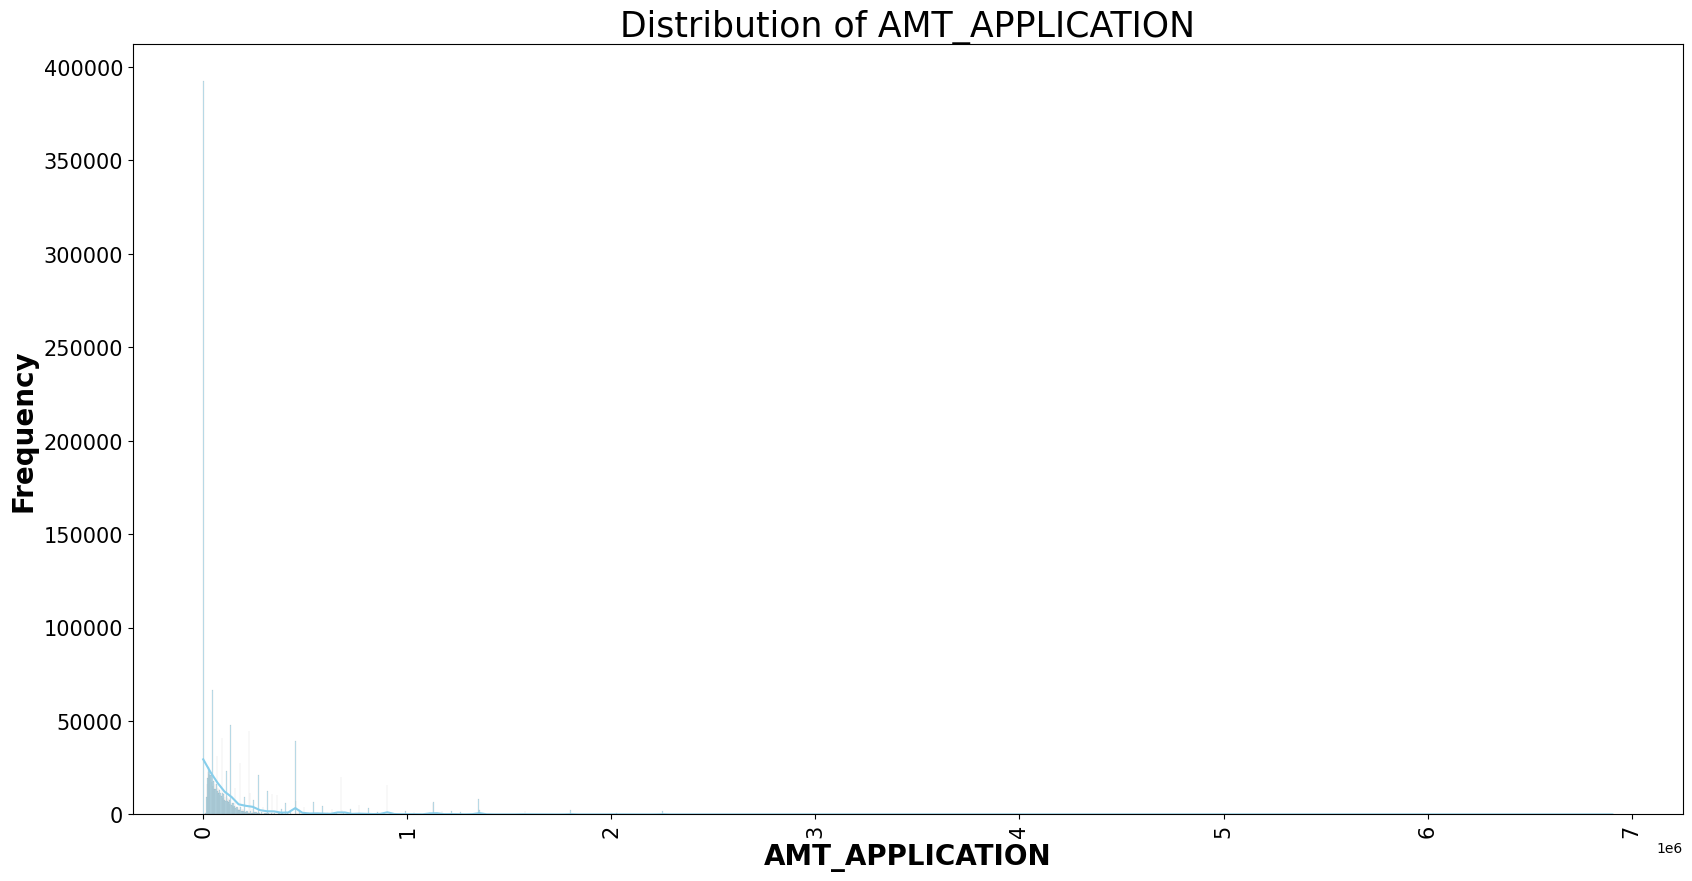

In [48]:
plot_distribution_df2('AMT_APPLICATION')

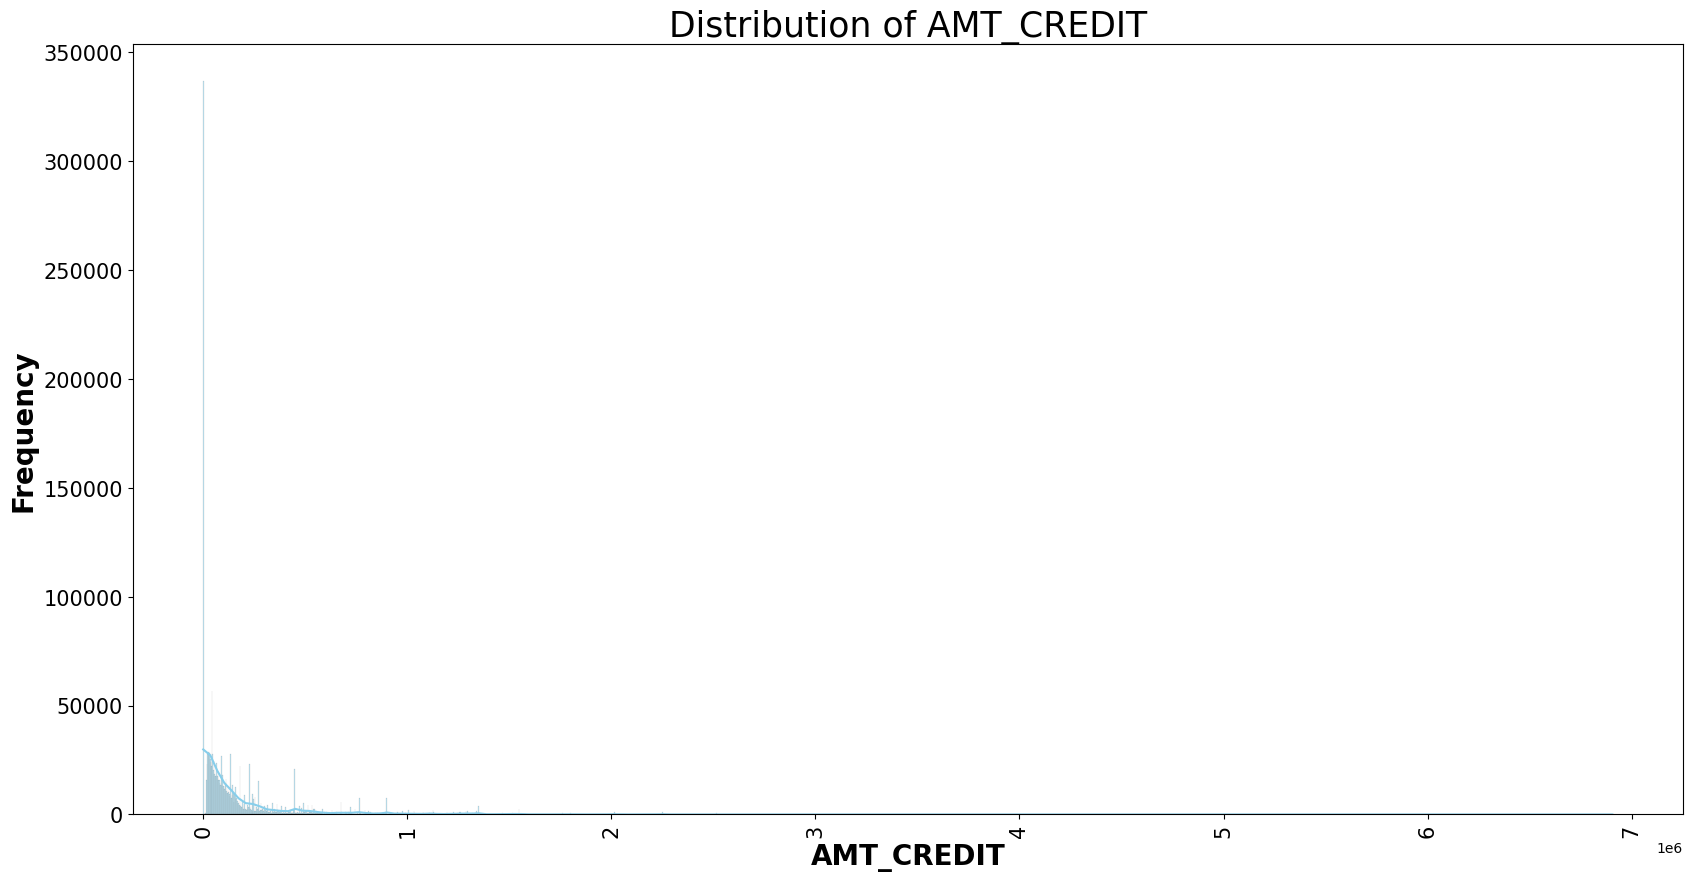

In [49]:
plot_distribution_df2('AMT_CREDIT')

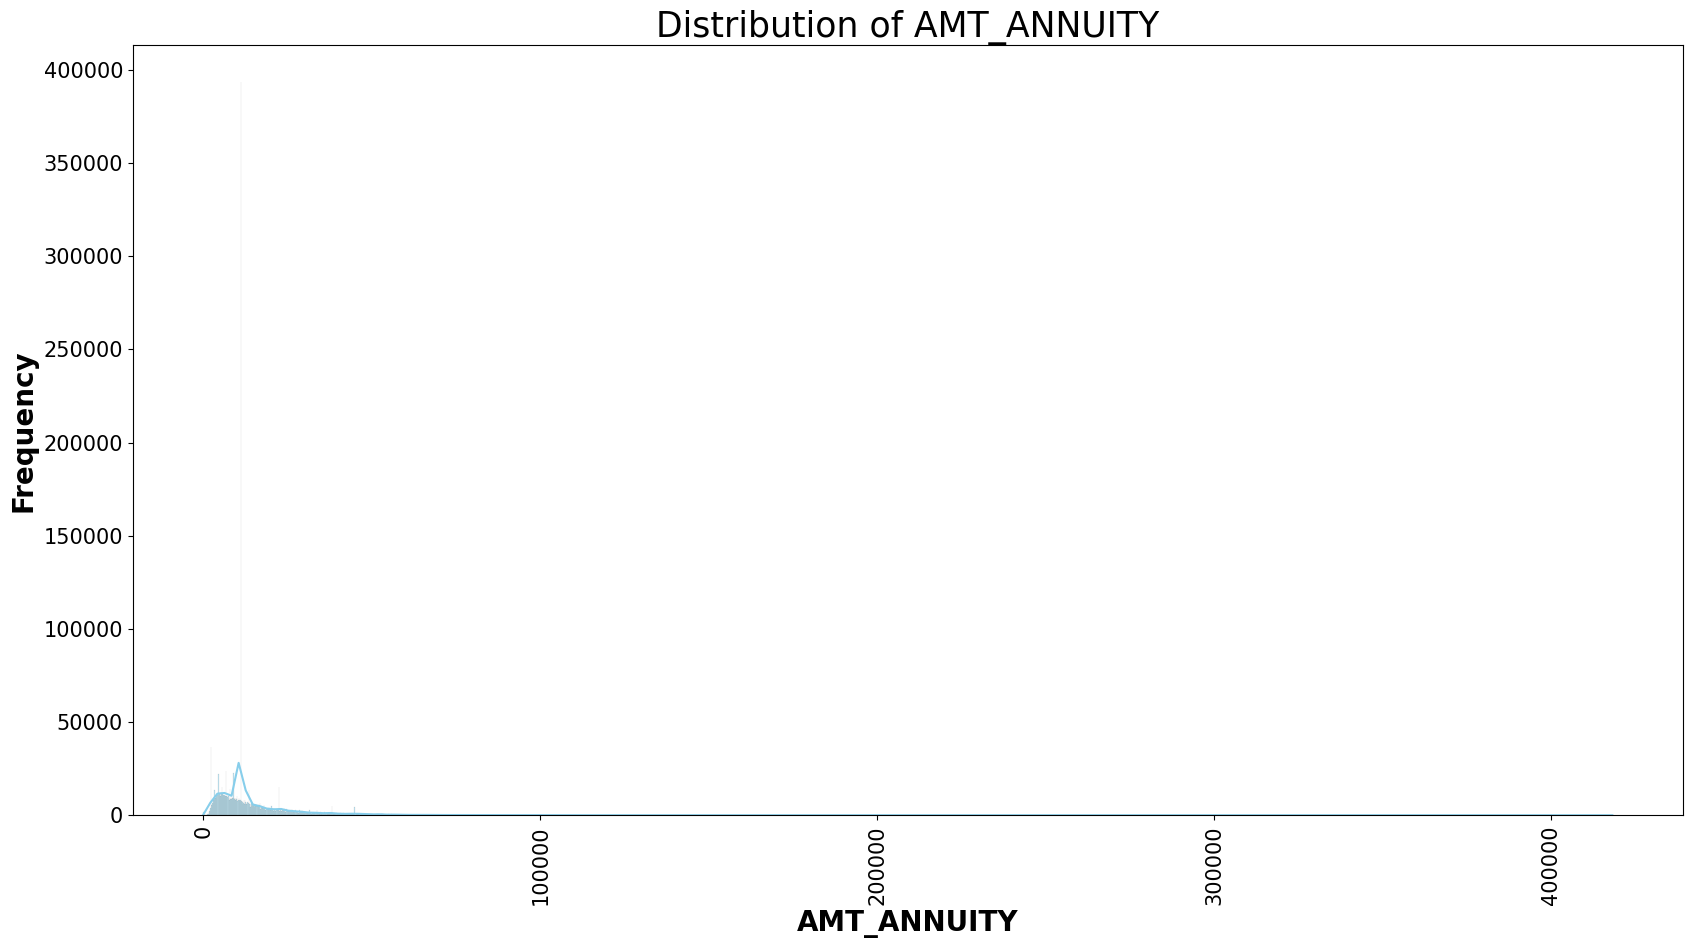

In [50]:
plot_distribution_df2('AMT_ANNUITY')

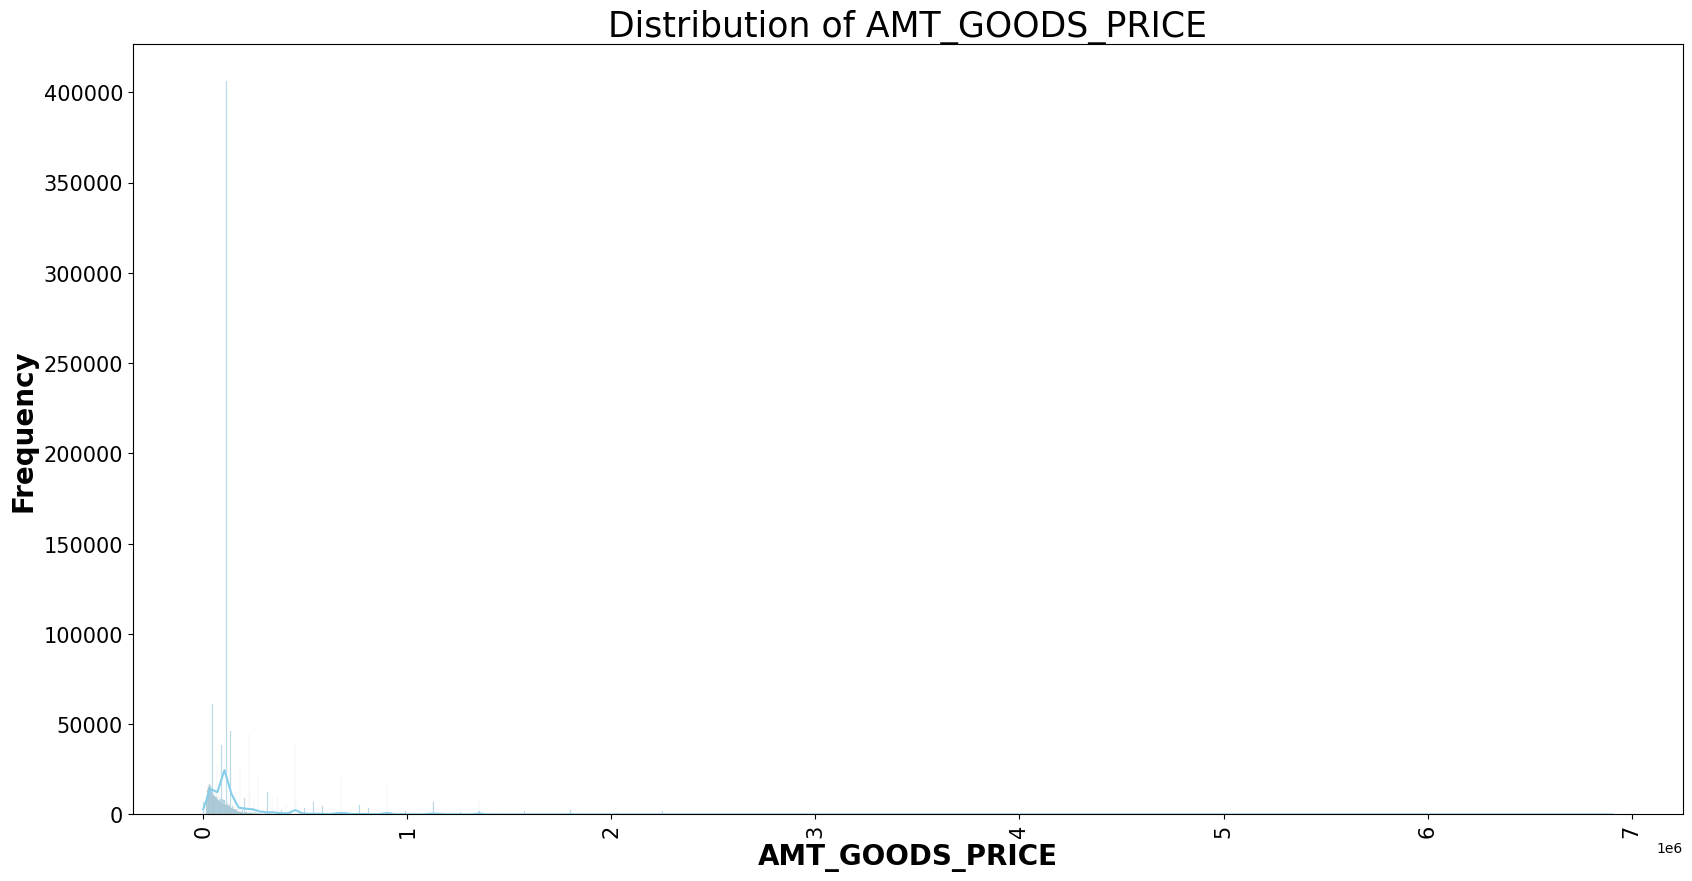

In [51]:
plot_distribution_df2('AMT_GOODS_PRICE')

# Bivariate Analysis

In [53]:
print("Unique Contract Statuses:")
print(df2['NAME_CONTRACT_STATUS'].value_counts())

Unique Contract Statuses:
NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: count, dtype: int64


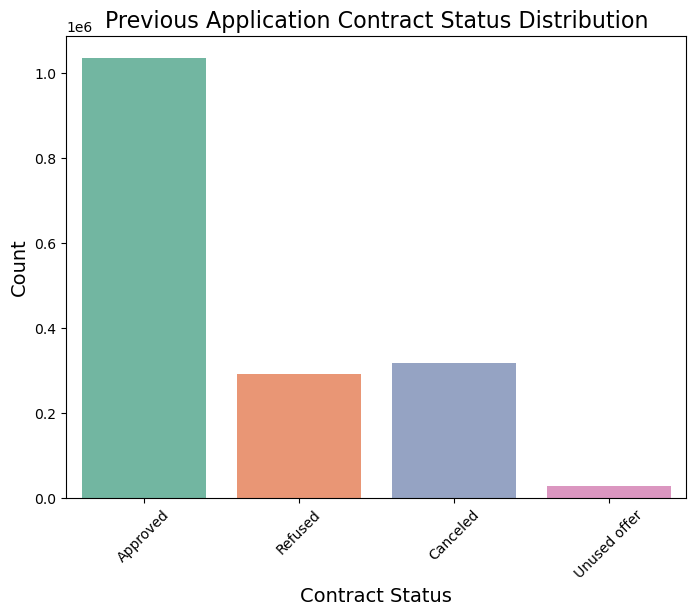

In [54]:
# Contract Status Distribution

plt.figure(figsize=(8,6))
sns.countplot(data=df2, x='NAME_CONTRACT_STATUS', palette='Set2')
plt.title('Previous Application Contract Status Distribution', fontsize=16)
plt.xlabel('Contract Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

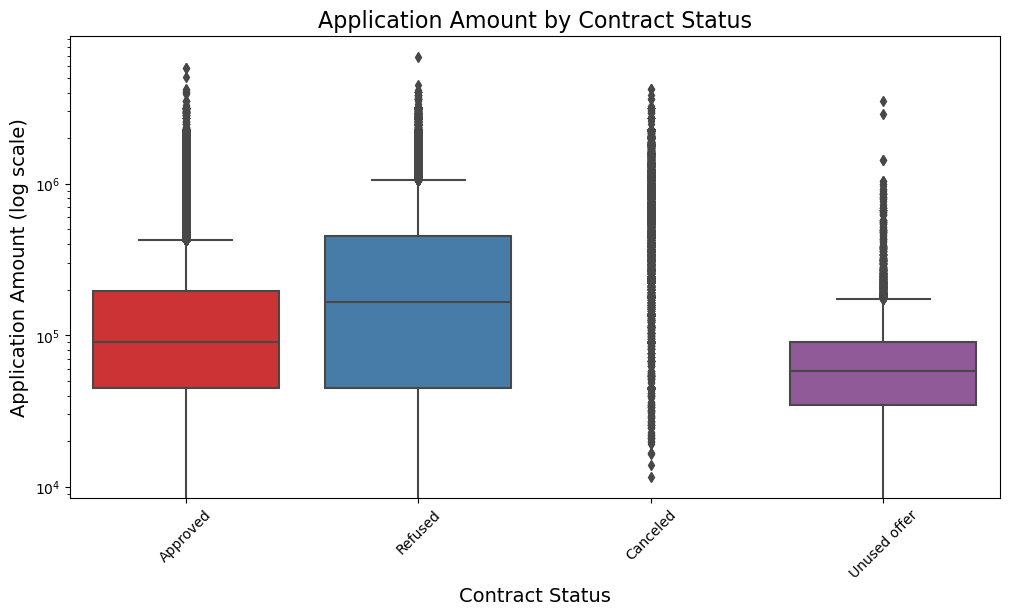

In [55]:
# Application Amount by Contract Status

plt.figure(figsize=(12,6))
sns.boxplot(data=df2, x='NAME_CONTRACT_STATUS', y='AMT_APPLICATION', palette='Set1')
plt.yscale('log')   
plt.title('Application Amount by Contract Status', fontsize=16)
plt.xlabel('Contract Status', fontsize=14)
plt.ylabel('Application Amount (log scale)', fontsize=14)
plt.xticks(rotation=45)
plt.show()


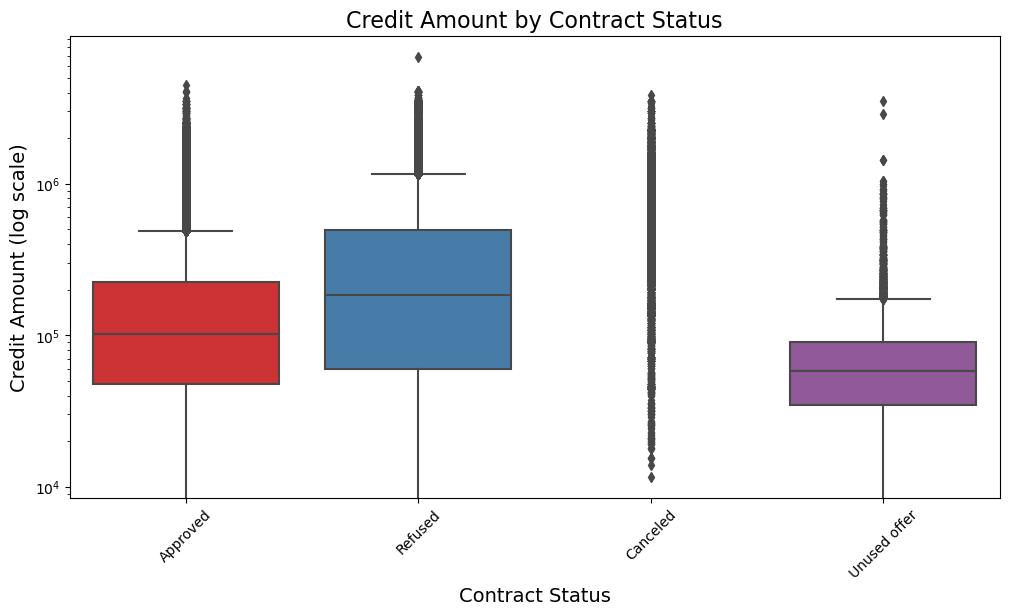

In [56]:
# Credit Amount by Contract Status

plt.figure(figsize=(12,6))
sns.boxplot(data=df2, x='NAME_CONTRACT_STATUS', y='AMT_CREDIT', palette='Set1')
plt.yscale('log')   
plt.title('Credit Amount by Contract Status', fontsize=16)
plt.xlabel('Contract Status', fontsize=14)
plt.ylabel('Credit Amount (log scale)', fontsize=14)
plt.xticks(rotation=45)
plt.show()


Pair Plot for Key Numeric Variables in previous data set

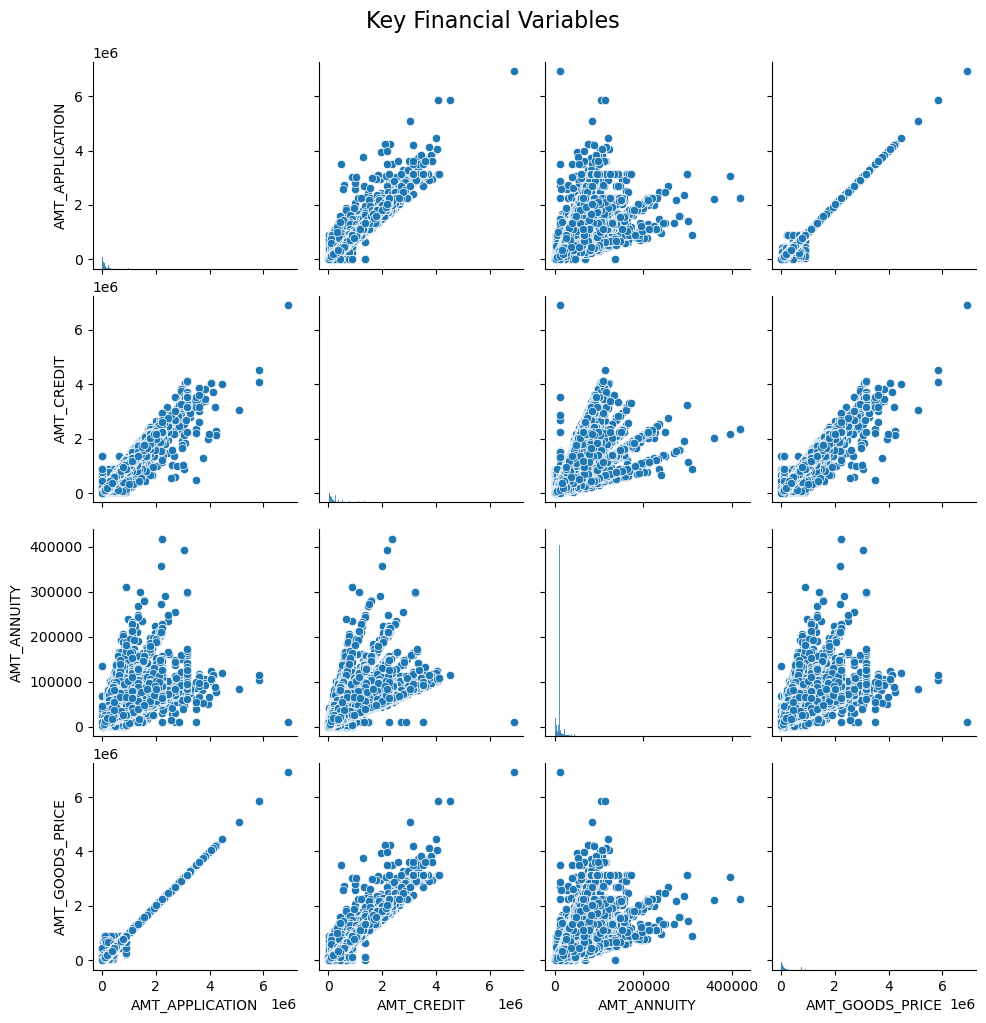

In [57]:
key_num_cols = ['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
sns.pairplot(df2[key_num_cols].dropna())
plt.suptitle("Key Financial Variables", y=1.02, fontsize=16)
plt.show()

# Correlation Analysis

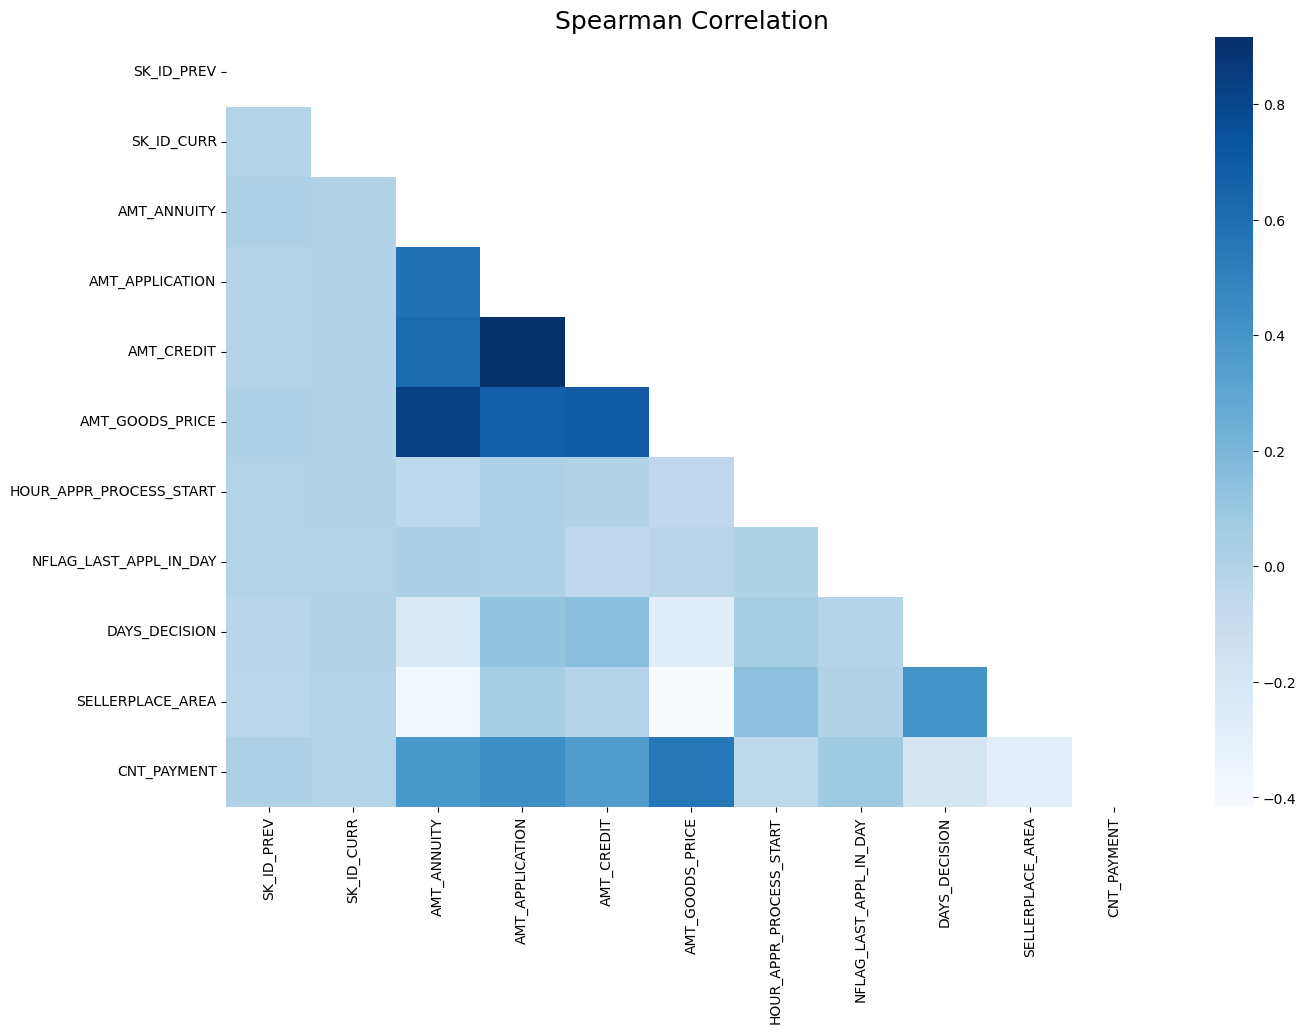

In [58]:
#Calculate the Spearman correlation on numeric columns of previous application data set
corr_matrix_df2 = df2.select_dtypes(include='number').corr(method='spearman')
mask = np.zeros_like(corr_matrix_df2)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix_df2, mask=mask, cmap='Blues', annot=True, fmt=".2f")
plt.title("Spearman Correlation", fontsize=18)
plt.show()

In [59]:
# Segment the data
df_nondefaulters = df1[df1['TARGET'] == 0].select_dtypes(include='number').drop(columns=['TARGET'])
df_defaulters = df1[df1['TARGET'] == 1].select_dtypes(include='number').drop(columns=['TARGET'])

# Compute correlations
corr_nondefaulters = df_nondefaulters.corr(method='spearman')
corr_defaulters = df_defaulters.corr(method='spearman')

# Function to extract top n correlations
def get_top_correlations(corr_matrix, n=3):
    # Unstack, take absolute value, sort, and then drop self correlations
    corr_unstacked = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)
    # Remove duplicates
    corr_unstacked = corr_unstacked[corr_unstacked < 1]
    return corr_unstacked.drop_duplicates().head(n)

print("Top correlations for non-defaulters:")
print(get_top_correlations(corr_nondefaulters, n=10))

print("Top correlations for defaulters:")
print(get_top_correlations(corr_defaulters, n=10))


Top correlations for non-defaulters:
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE      0.997364
AMT_CREDIT                   AMT_GOODS_PRICE               0.985510
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.861861
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.843626
AMT_CREDIT                   AMT_ANNUITY                   0.831900
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.830381
AMT_ANNUITY                  AMT_GOODS_PRICE               0.830368
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.810519
DAYS_EMPLOYED                DAYS_BIRTH                    0.583506
AMT_INCOME_TOTAL             AMT_ANNUITY                   0.485699
dtype: float64
Top correlations for defaulters:
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.997062
AMT_CREDIT                  AMT_GOODS_PRICE                0.977224
DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.857467
REG_REGION_NOT_WORK_REGION  LIV

# Quantify outliers using the IQR method

For Application Data (df1): Quantify Outliers for AMT_CREDIT

df1 - AMT_CREDIT
Q1: 270000.0
Q3: 808650.0
IQR: 538650.0
Lower Bound: -537975.0
Upper Bound: 1616625.0
Number of lower outliers: 0
Number of upper outliers: 6562


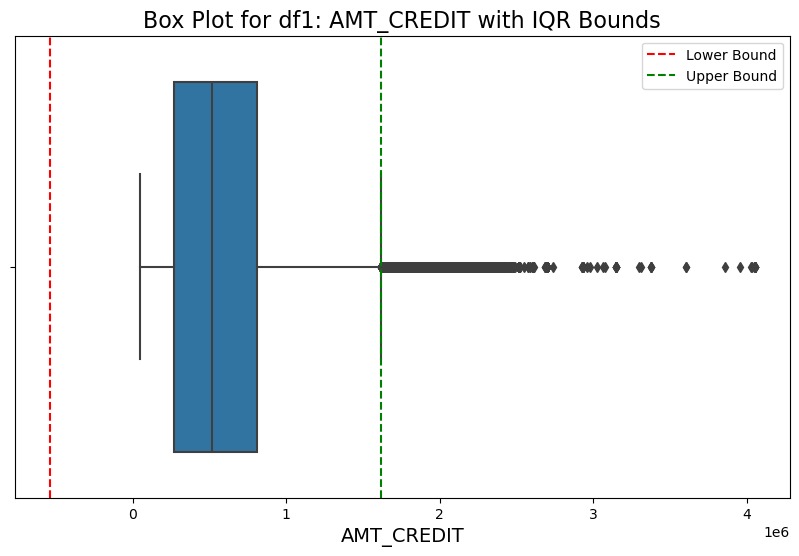

In [60]:
    # Quantify outliers for the AMT_CREDIT variable in df1 using the IQR method

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1_df1 = df1['AMT_CREDIT'].quantile(0.25)
    Q3_df1 = df1['AMT_CREDIT'].quantile(0.75)
    IQR_df1 = Q3_df1 - Q1_df1

    print("df1 - AMT_CREDIT")
    print("Q1:", Q1_df1)
    print("Q3:", Q3_df1)
    print("IQR:", IQR_df1)

    # Define lower and upper bounds for outliers
    lower_bound_df1 = Q1_df1 - 1.5 * IQR_df1
    upper_bound_df1 = Q3_df1 + 1.5 * IQR_df1

    print("Lower Bound:", lower_bound_df1)
    print("Upper Bound:", upper_bound_df1)

    # Identify outliers in df1
    outliers_df1_low = df1[df1['AMT_CREDIT'] < lower_bound_df1]
    outliers_df1_high = df1[df1['AMT_CREDIT'] > upper_bound_df1]

    print("Number of lower outliers:", len(outliers_df1_low))
    print("Number of upper outliers:", len(outliers_df1_high))

    # Plot a box plot with IQR bounds for visual reference
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df1['AMT_CREDIT'])
    plt.axvline(lower_bound_df1, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(upper_bound_df1, color='green', linestyle='--', label='Upper Bound')
    plt.title("Box Plot for df1: AMT_CREDIT with IQR Bounds", fontsize=16)
    plt.xlabel("AMT_CREDIT", fontsize=14)
    plt.legend()
    plt.show()


For Previous Application Data (df2): Quantify Outliers for AMT_APPLICATION

df2 - AMT_APPLICATION
Q1: 18720.0
Q3: 180360.0
IQR: 161640.0
Lower Bound: -223740.0
Upper Bound: 422820.0
Number of lower outliers: 0
Number of upper outliers: 208019


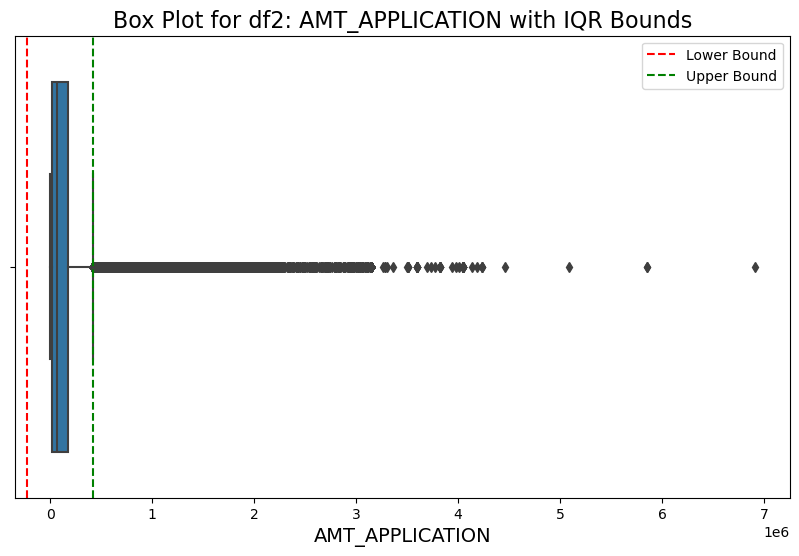

In [61]:
# Quantify outliers for the AMT_APPLICATION variable in df2 using the IQR method

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1_df2 = df2['AMT_APPLICATION'].quantile(0.25)
Q3_df2 = df2['AMT_APPLICATION'].quantile(0.75)
IQR_df2 = Q3_df2 - Q1_df2

print("df2 - AMT_APPLICATION")
print("Q1:", Q1_df2)
print("Q3:", Q3_df2)
print("IQR:", IQR_df2)

# Define lower and upper bounds for outliers
lower_bound_df2 = Q1_df2 - 1.5 * IQR_df2
upper_bound_df2 = Q3_df2 + 1.5 * IQR_df2

print("Lower Bound:", lower_bound_df2)
print("Upper Bound:", upper_bound_df2)

# Identify outliers in df2
outliers_df2_low = df2[df2['AMT_APPLICATION'] < lower_bound_df2]
outliers_df2_high = df2[df2['AMT_APPLICATION'] > upper_bound_df2]

print("Number of lower outliers:", len(outliers_df2_low))
print("Number of upper outliers:", len(outliers_df2_high))

# Plot a box plot with IQR bounds for visual reference
plt.figure(figsize=(10, 6))
sns.boxplot(x=df2['AMT_APPLICATION'])
plt.axvline(lower_bound_df2, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound_df2, color='green', linestyle='--', label='Upper Bound')
plt.title("Box Plot for df2: AMT_APPLICATION with IQR Bounds", fontsize=16)
plt.xlabel("AMT_APPLICATION", fontsize=14)
plt.legend()
plt.show()
